In [1]:
import sys

sys.path.append(".")

import os
import pickle
import numpy as np
import pandas as pd
from utils import read_msi
from pyimzml.ImzMLWriter import ImzMLWriter
from pyimzml.ImzMLParser import ImzMLParser
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from processing import MeanSegmentation, ZScoreCorrection
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler

# Define current folder using this file
CWD = "."
# Define folder that contains the revision chip type dataset
BASE_PATH = Path(os.path.join(CWD, "..", "data", "OPTIMIZATION"))
# Define folder that contains raw data
RAW_DATA = BASE_PATH.joinpath("raw")
# Define folder to save aligned data
ALIGNED_DATA = BASE_PATH.joinpath("aligned")
# Define folder to save processed data
PROCESSED_DATA = BASE_PATH.joinpath("processed")

In [ ]:
# Run correlation analysis for each brain
# Run change diff analysis between day 0 to day 5 - treatment affect?

In [2]:

  print(file.name)

200129-angle80 Analyte 1_1.ibd
200129-angle60 Analyte 1_1.ibd
200129-angle60 Analyte 1_1.imzml
200129-angle65 Analyte 1_1.imzml
200129-angle70 Analyte 1_1.imzml
200129-angle75 Analyte 1_1.imzml
200129-angle80 Analyte 1_1.imzml
200130-sid-6 Analyte 2_1.ibd
200129-angle65 Analyte 1_1.ibd
200129-angle70 Analyte 1_1.ibd
200129-angle75 Analyte 1_1.ibd
240120-solvent-100MeOH-after Analyte 3_1.imzml
240120-solvent-85MeOH-OK Analyte 3_1.imzml
240120-solvent-90MeOH Analyte 3_1.imzml
240120-solvent-93MeOH-bis Analyte 3_1.imzml
240120-solvent-95MeOH Analyte 3_1.imzml
240120-solvent-95MeOHactual95 Analyte 3_1.imzml
200130-sid-4 Analyte 2_1.imzml
240120-solvent-100MeOH-after Analyte 3_1.ibd
240120-solvent-85MeOH-OK Analyte 3_1.ibd
240120-solvent-90MeOH Analyte 3_1.ibd
240120-solvent-93MeOH-bis Analyte 3_1.ibd
240120-solvent-95MeOH Analyte 3_1.ibd
240120-solvent-95MeOHactual95 Analyte 3_1.ibd
200130-sid-6 Analyte 2_1.imzml
200129-ssd-3 Analyte 2_1.ibd
200128-pess_n_flow-3-0_5 Analyte 1_1.ibd
200128-

In [5]:
for msi_path in RAW_DATA.iterdir():
  if msi_path.suffix != ".imzml":
    continue
  try:
    min_x, min_y = np.inf, np.inf
    max_x, max_y = -np.inf, -np.inf
    with ImzMLParser(msi_path) as reader:
      for _, (x, y, z) in enumerate(reader.coordinates):
        if x < min_x:
          min_x = x
        elif x > max_x:
          max_x = x
        if y < min_y:
          min_y = y
        elif y > max_y:
          max_y = y
    print(f"{msi_path.stem},{min_x},{min_y},{max_x},{max_y}")
  except Exception as e:
    print(f"Error: {msi_path.stem}, {e}")

/home/leorro/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession MS:1000526 found with incorrect name "Waters raw file". Updating name to "Waters raw format".
  warn(
/home/leorro/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
/home/leorro/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
/home/leorro/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  warn(


200129-angle60 Analyte 1_1,1,1,20,20
200129-angle65 Analyte 1_1,1,1,20,20
200129-angle70 Analyte 1_1,1,1,20,20
200129-angle75 Analyte 1_1,1,1,20,20
200129-angle80 Analyte 1_1,1,1,20,20
240120-solvent-100MeOH-after Analyte 3_1,1,1,40,20
240120-solvent-85MeOH-OK Analyte 3_1,1,1,40,20
240120-solvent-90MeOH Analyte 3_1,1,1,40,20
240120-solvent-93MeOH-bis Analyte 3_1,1,1,40,20
240120-solvent-95MeOH Analyte 3_1,1,1,40,20
240120-solvent-95MeOHactual95 Analyte 3_1,1,1,40,20
200130-sid-4 Analyte 2_1,1,1,40,20
200130-sid-6 Analyte 2_1,1,1,40,20
200128-pess_n_flow-3-0_5 Analyte 1_1,1,1,20,20
200128-pess_n_flow-3-1 Analyte 1_1,1,1,20,20
200128-pess_n_flow-3-1_5 Analyte 1_1,1,1,20,20
200128-pess_n_flow-3-2 Analyte 1_1,1,1,20,20
200128-pess_n_flow-3-2_5 Analyte 1_1,1,1,20,20
200128-pess_n_flow-4-0_5-ok Analyte 1_1,1,1,20,20
200128-pess_n_flow-4-1 Analyte 1_1,1,1,20,20
200128-pess_n_flow-4-1_5 Analyte 1_1,1,1,20,20
200128-pess_n_flow-4-2 Analyte 1_1,1,1,20,20
200128-pess_n_flow-4-2_5 Analyte 1_1,1,1,

In [ ]:
meta = pd.read_csv(BASE_PATH / "metadata.csv")
for file_name in tqdm(meta.file_name):
  try:
    msi_path = RAW_DATA / f"{file_name}.imzML"
    min_x, min_y = np.inf, np.inf
    max_x, max_y = -np.inf, -np.inf
    with ImzMLParser(msi_path) as reader:
      for _, (x, y, z) in enumerate(reader.coordinates):
        if x < min_x:
          min_x = x
        elif x > max_x:
          max_x = x
        if y < min_y:
          min_y = y
        elif y > max_y:
          max_y = y
    print(f"{msi_path.stem},{min_x},{min_y},{max_x},{max_y}")
  except Exception as e:
    print(f"Error: {msi_path.stem}, {e}")

In [ ]:
# Create segmentation using new method.
# Create figure showing comparison between old and new segmentation for motivation

from skimage import filters
from skimage.morphology import disk


def new_segment(img, mzs, res, peaks):
  """Method to segment msi image.
    
    Args:
        img (np.ndarray): Continues mass spectrum image.
    
    Returns:
      np.ndarray: Segmentation image.

    """
  # Define filter of peaks
  seg_all = False
  for peak in peaks:
    filter_mzs = ((mzs >= peak - res) & (mzs <= peak + res))
    peak_img = img[:, :, filter_mzs].sum(axis=-1)
    smooth = filters.median(peak_img, disk(2))
    seg_all |= (smooth > filters.threshold_mean(smooth))
  return seg_all


save_path = Path(".") / "longitudinal" / "segmentation_compare"
save_path.mkdir(parents=True, exist_ok=True)

for folder in PROCESSED_DATA.iterdir():
  msi_path = folder / 'common_representation.imzML'
  if 'tmz' in folder.name and "tumor" in folder.name and 'brain_6' in folder.name:
    representative_peaks = [600.51, 888.62, 682.64]
    thresh = 0.05

    # Parse the msi file
    with ImzMLParser(msi_path) as reader:
      # Get full msi
      mzs, img = read_msi(reader)
      #
      fig, axes = plt.subplots(1, 2)
      old_seg = np.load(folder / "segmentation.npy")
      new_seg = new_segment(img, mzs, thresh, representative_peaks)
      axes[0].imshow(old_seg, cmap="gray_r")
      axes[0].axis('off')
      axes[1].imshow(new_seg, cmap="gray_r")
      axes[1].axis('off')
      plt.tight_layout()
      plt.savefig(
          save_path / f"{folder.name}.png", bbox_inches='tight', dpi=1200,
          transparent=True
      )
      plt.show()
      np.save((folder / 'segmentation_new.npy'), new_seg)

In [ ]:
# Redo zscore using new segmentation

for folder in PROCESSED_DATA.iterdir():
  msi_path = folder / 'common_representation.imzML'
  if 'tmz' in folder.name and "tumor" in folder.name and 'brain_5' in folder.name:
    with ImzMLParser(msi_path) as reader:
      # Get full msi
      mzs, img = read_msi(reader)
      # Segment image
      segment_img = np.load((folder / 'segmentation_new.npy'))
      # Apply image correction
      zscore_img = ZScoreCorrection().correct(img, segment_img)

      # Open writer
      with ImzMLWriter(
          os.path.join(folder, "meaningful_signal.imzML"), mode="continuous"
      ) as writer:
        # Save zscore image
        for _, (x, y, z) in enumerate(reader.coordinates):
          writer.addSpectrum(mzs, zscore_img[y - 1, x - 1], (x, y, z))

In [ ]:
# Run HCA analysis


def perform_hierarchical_clustering(pixels, n_clusters):
  # Perform hierarchical clustering
  clustering = AgglomerativeClustering(
      n_clusters=n_clusters, linkage='ward', compute_distances=True
  )
  clustering.fit(pixels)
  return clustering


def plot_dendrogram(model, path, name, **kwargs):
  # Create linkage matrix and plot the dendrogram
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)

  fig, ax = plt.subplots(figsize=(15, 10))
  dendrogram(linkage_matrix, **kwargs)
  for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize('14')
    label.set_color('0.2')
  for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(2.5)
    ax.spines[spine].set_color('0.2')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.tight_layout()
  plt.savefig(
      path / f"{name}_dendrogram.png", bbox_inches='tight', dpi=1200,
      transparent=True
  )
  plt.show()


def plot_clusters(labels, mask, original_shape, path, name):
  #
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(n_clusters)]
  colors = np.vstack(([1, 1, 1, 1], selected_colors))
  custom_cmap = ListedColormap(colors)

  # Reshape labels to original image shape
  label_image = np.zeros(original_shape)
  label_image[mask] = labels
  #flipped_label_image = np.fliplr(label_image)
  seg_c_map = plt.imshow(label_image, cmap=custom_cmap, vmin=0, vmax=n_clusters)
  cbar = plt.colorbar(
      seg_c_map, ticks=np.arange(1, n_clusters + 1),
      boundaries=np.arange(0.5, n_clusters + 1.5)
  )
  cbar.set_ticklabels(range(1, n_clusters + 1))
  cbar.set_label(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  cbar.outline.set_edgecolor('0.2')
  cbar.ax.tick_params(labelsize=14, width=2.5, color='0.2')
  for l in cbar.ax.get_yticklabels():
    l.set_fontweight('bold')
    l.set_color('0.2')
  plt.axis('off')
  plt.tight_layout()
  plt.savefig(
      path / f"{name}_clusters.png", bbox_inches='tight', dpi=1200,
      transparent=True
  )
  plt.show()


def find_top_mz_values_per_cluster(
    img_filtered, labels, mzs_filtered, n_clusters, top_n=30
):
  # Initialize an array to store the mean intensities of m/z values for each cluster
  cluster_means = [
      np.mean(img_filtered[labels == i], axis=0)
      for i in range(1, n_clusters + 1)
  ]

  # Find the top 30 m/z values in each cluster and collect their indices
  top_indices = [
      np.argsort(cluster_mean)[-top_n:] for cluster_mean in cluster_means
  ]

  # Retrieve the m/z values corresponding to these indices
  top_mz_values = [mzs_filtered[indices] for indices in top_indices]

  # Combine and find unique m/z values across all clusters
  unique_mz_values = np.unique(np.concatenate(top_mz_values))

  # Create a dictionary to map m/z values to indices for easy lookup
  mz_to_index = {mz: idx for idx, mz in enumerate(unique_mz_values)}

  # Create a heatmap data matrix
  heatmap_data = np.zeros((len(unique_mz_values), n_clusters))

  # Fill the heatmap data matrix
  for cluster_index, indices in enumerate(top_indices):
    for idx in indices:
      mz_value = mzs_filtered[idx]
      heatmap_data[mz_to_index[mz_value],
                   cluster_index] = cluster_means[cluster_index][idx]

  return heatmap_data, unique_mz_values


def plot_heatmap(heatmap_data, unique_mz_values, n_clusters, path, name):
  fig, ax = plt.subplots(figsize=(5, 10))
  im = ax.imshow(heatmap_data, aspect='auto', cmap='viridis')

  # Create colorbar
  cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046)
  cbar.outline.set_edgecolor('0.2')
  cbar.set_ticks([])

  # We want to show all ticks...
  ax.set_xticks(np.arange(n_clusters))
  ax.set_yticks(np.arange(len(unique_mz_values)))

  # ... and label them with the respective list entries
  ax.set_xticklabels(range(1, n_clusters + 1))
  ax.set_yticklabels(np.round(unique_mz_values, decimals=2))

  # Turn spines off and create white grid.
  ax.spines[:].set_visible(False)
  ax.set_xticks(np.arange(heatmap_data.shape[1] + 1) - .5, minor=True)
  ax.set_yticks(np.arange(heatmap_data.shape[0] + 1) - .5, minor=True)
  ax.tick_params(which="minor", size=0)

  plt.xlabel(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  plt.ylabel('m/z', labelpad=15, fontweight='bold', fontsize=14, color='0.2')
  plt.tight_layout()
  plt.savefig(
      path / f"{name}_heatmap.png", bbox_inches='tight', dpi=1200,
      transparent=True
  )
  plt.show()


n_clusters = 3
save_path = Path(".") / "longitudinal" / "hca_gaussian_smoothing_scaled"
save_path.mkdir(parents=True, exist_ok=True)
for folder in PROCESSED_DATA.iterdir():
  if 'tmz' in folder.name and "tumor" in folder.name:
    msi_path = folder / 'meaningful_signal.imzML'
    msi_seg = np.load(folder / "segmentation_new.npy")

    with ImzMLParser(msi_path) as p:
      mzs, img = read_msi(p)
      mzs_filter = (mzs >= 600) & (mzs <= 900)

      #smoothed_img = ndimage.median_filter(img_filter, 3)
      smoothed_img = ndimage.gaussian_filter(img, sigma=0.5)

      scaler = MinMaxScaler(clip=True)
      scaled_img_flat = scaler.fit_transform(smoothed_img[msi_seg])

      # Cluster the pixels
      cluster_model = perform_hierarchical_clustering(
          scaled_img_flat[:, mzs_filter], n_clusters
      )

      with open(save_path / f"{folder.name}_hca.pkl", 'wb') as f:
        pickle.dump(cluster_model, f)

      # Plot dendrogram
      plot_dendrogram(
          cluster_model, save_path, folder.name, truncate_mode='level', p=3
      )

      # Plot clusters
      plot_clusters(
          cluster_model.labels_ + 1, msi_seg, img.shape[:-1], save_path,
          folder.name
      )

      heatmap_data, unique_mz_values = find_top_mz_values_per_cluster(
          scaled_img_flat[:, mzs_filter], cluster_model.labels_ + 1,
          mzs[mzs_filter], n_clusters
      )

      plot_heatmap(
          heatmap_data, unique_mz_values, n_clusters, save_path, folder.name
      )

In [ ]:
def plot_clusters(labels, mask, original_shape, path, name):
  #
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(n_clusters)]
  colors = np.vstack(([1, 1, 1, 1], selected_colors))
  custom_cmap = ListedColormap(colors)

  # Reshape labels to original image shape
  label_image = np.zeros(original_shape)
  label_image[mask] = labels
  #flipped_label_image = np.fliplr(label_image)
  seg_c_map = plt.imshow(label_image, cmap=custom_cmap, vmin=0, vmax=n_clusters)
  cbar = plt.colorbar(
      seg_c_map, ticks=np.arange(1, n_clusters + 1),
      boundaries=np.arange(0.5, n_clusters + 1.5)
  )
  cbar.set_ticklabels(range(1, n_clusters + 1))
  cbar.set_label(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  cbar.outline.set_edgecolor('0.2')
  cbar.ax.tick_params(labelsize=14, width=2.5, color='0.2')
  for l in cbar.ax.get_yticklabels():
    l.set_fontweight('bold')
    l.set_color('0.2')
  plt.axis('off')
  plt.tight_layout()
  plt.savefig(
      path / f"{name}_clusters.png", bbox_inches='tight', dpi=1200,
      transparent=True
  )
  plt.show()


n_clusters = 3
save_path = Path(".") / "longitudinal" / "hca_median_smoothing"
save_path.mkdir(parents=True, exist_ok=True)
for folder in PROCESSED_DATA.iterdir():
  if 'tmz' in folder.name and "tumor" in folder.name and 'brain_6' in folder.name:
    msi_path = folder / 'meaningful_signal.imzML'
    msi_seg = np.load(folder / "segmentation_new.npy")
    hca_path = Path(
        "."
    ) / "longitudinal" / "hca_median_smoothing" / f"{folder.name}_hca.pkl"
    with ImzMLParser(msi_path) as p:
      mzs, img = read_msi(p)
      mzs_filter = (mzs >= 600) & (mzs <= 900)
      img_filter = img[:, :, mzs_filter]

    with open(hca_path, 'rb') as f:
      cluster_model = pickle.load(f)

    plot_clusters(
        cluster_model.labels_ + 1, msi_seg, img_filter.shape[:-1], save_path,
        folder.name
    )

In [ ]:
def find_top_mz_values_across_images(
    img_filtered_list, labels_list, mzs_filtered_list, top_n=30
):
  # Initialize lists to collect data across images
  all_cluster_means = []
  all_top_indices = []
  all_mzs_filtered = []

  # Process each image
  for img_filtered, labels, mzs_filtered in zip(
      img_filtered_list, labels_list, mzs_filtered_list
  ):
    # Calculate cluster means for each image
    cluster_means = [
        np.mean(img_filtered[labels == i], axis=0)
        for i in range(1, 4)  # Since n_clusters is always 3
    ]
    all_cluster_means.extend(cluster_means)

    # Ensure each cluster_mean is a NumPy array
    cluster_means = [np.array(cluster_mean) for cluster_mean in cluster_means]

    # Find the top m/z values in each cluster
    top_indices = [
        np.argsort(cluster_mean)[-top_n:] for cluster_mean in cluster_means
    ]

    all_top_indices.extend(top_indices)
    all_mzs_filtered.append(mzs_filtered)

  # Combine all m/z values and find unique ones
  combined_mzs_filtered = np.concatenate(all_mzs_filtered)
  unique_mz_values = np.unique(
      np.concatenate([mzs_filtered[indices] for indices in all_top_indices])
  )

  # Create a dictionary to map m/z values to indices for easy lookup
  mz_to_index = {mz: idx for idx, mz in enumerate(unique_mz_values)}

  # Calculate total number of clusters across all images
  total_clusters = len(img_filtered_list) * 3  # Since n_clusters is always 3

  # Create a heatmap data matrix
  heatmap_data = np.zeros((len(unique_mz_values), total_clusters))

  # Fill the heatmap data matrix
  for cluster_index, (indices, cluster_means) in enumerate(
      zip(all_top_indices, all_cluster_means)
  ):
    for idx in indices:
      mz_value = combined_mzs_filtered[idx]
      heatmap_data[mz_to_index[mz_value], cluster_index] = cluster_means[idx]

  return heatmap_data, unique_mz_values


def plot_heatmap(heatmap_data, unique_mz_values, n_clusters, path, name):
  fig, ax = plt.subplots(figsize=(20, 10))
  im = ax.imshow(
      heatmap_data.T, aspect='auto', cmap='viridis',
      vmax=np.percentile(heatmap_data, 99)
  )

  # Create colorbar
  cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046)
  cbar.outline.set_edgecolor('0.2')
  cbar.set_ticks([])
  cbar.ax.set_ylabel(
      "Zscore", labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  # We want to show all ticks...
  ax.set_yticks(np.arange(heatmap_data.shape[-1]))
  ax.set_xticks(np.arange(len(unique_mz_values)))

  # ... and label them with the respective list entries
  yticklabels = ["Day_0-1", "Day_0-2", "Day_0-3"]
  for rep in range(int(heatmap_data.shape[-1] / n_clusters) - 1):
    yticklabels.extend(
        [f"Day_5_{rep+1}-1", f"Day_5_{rep+1}-2", f"Day_5_{rep+1}-3"]
    )

  ax.set_yticklabels(yticklabels, va='center')
  ax.set_xticklabels(np.round(unique_mz_values, decimals=2), rotation=90)

  # Turn spines off and create white grid.
  ax.spines[:].set_visible(False)
  ax.set_yticks(np.arange(heatmap_data.shape[1] + 1) - .5, minor=True)
  ax.set_xticks(np.arange(heatmap_data.shape[0] + 1) - .5, minor=True)
  ax.tick_params(which="minor", size=0)

  plt.ylabel(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  plt.xlabel('m/z', labelpad=15, fontweight='bold', fontsize=14, color='0.2')
  plt.tight_layout()

  plt.savefig(
      path / f"{name}_combined_heatmap.png", bbox_inches='tight', dpi=1200,
      transparent=True
  )

  plt.show()
  plt.clf()


groups = [
    [
        "tmz_1_tumor_brain_1_day_0_0_uM",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_1",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_2",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_3"
    ],
    [
        "tmz_2_tumor_brain_1_day_0_0_uM",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_1",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_2",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_3"
    ],
    [
        "tmz_1_tumor_brain_1_day_0_1000_uM",
        "tmz_1_tumor_brain_1_day_5_1000_uM_rep_1",
        "tmz_1_tumor_brain_1_day_5_1000_uM_rep_2"
    ],
    [
        "tmz_2_tumor_brain_1_day_0_1000_uM",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_1",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_2",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_2_day_0_0_uM", "tmz_tumor_brain_2_day_5_0_uM_rep_1",
        "tmz_tumor_brain_2_day_5_0_uM_rep_2",
        "tmz_tumor_brain_2_day_5_0_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_2_day_0_1000_uM",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_1",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_2",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_1_tumor_brain_3_day_0_0_uM",
        "tmz_1_tumor_brain_3_day_5_0_uM_rep_1",
        "tmz_1_tumor_brain_3_day_5_0_uM_rep_2"
    ],
    ["tmz_2_tumor_brain_3_day_0_0_uM", "tmz_2_tumor_brain_3_day_5_0_uM_rep_1"],
    [
        "tmz_1_tumor_brain_3_day_0_1000_uM",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_1",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_2",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_3",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_4"
    ],
    [
        "tmz_2_tumor_brain_3_day_0_1000_uM",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_1",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_2",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_4_day_0_0_uM", "tmz_tumor_brain_4_day_5_0_uM_rep_1",
        "tmz_tumor_brain_4_day_5_0_uM_rep_2",
        "tmz_tumor_brain_4_day_5_0_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_4_day_0_1000_uM",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_1",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_2",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_5_day_0_0_uM", "tmz_tumor_brain_5_day_5_0_uM_rep_1",
        "tmz_tumor_brain_5_day_5_0_uM_rep_2",
        "tmz_tumor_brain_5_day_5_0_uM_rep_3"
    ],
    [
        "tmz_1_tumor_brain_5_day_0_1000_uM",
        "tmz_1_tumor_brain_5_day_5_1000_uM_rep_1",
        "tmz_1_tumor_brain_5_day_5_1000_uM_rep_2",
        "tmz_1_tumor_brain_5_day_5_1000_uM_rep_3",
        "tmz_1_tumor_brain_5_day_5_1000_uM_rep_4"
    ],
    [
        "tmz_2_tumor_brain_5_day_0_1000_uM",
        "tmz_2_tumor_brain_5_day_5_1000_uM_rep_1",
        "tmz_2_tumor_brain_5_day_5_1000_uM_rep_2",
        "tmz_2_tumor_brain_5_day_5_1000_uM_rep_3"
    ]
]

groups = [
    [
        "tmz_tumor_brain_6_day_0_0_uM", "tmz_tumor_brain_6_day_5_0_uM_rep_1",
        "tmz_tumor_brain_6_day_5_0_uM_rep_2",
        "tmz_tumor_brain_6_day_5_0_uM_rep_3",
        "tmz_tumor_brain_6_day_5_0_uM_rep_4"
    ],
    [
        "tmz_tumor_brain_6_day_0_1000_uM",
        "tmz_tumor_brain_6_day_5_1000_uM_rep_1",
        "tmz_tumor_brain_6_day_5_1000_uM_rep_2"
    ],
]

for group in groups:
  img_filtered_list = []
  labels_list = []
  mzs_filtered_list = []
  for folder_name in group:
    msi_path = PROCESSED_DATA / folder_name / 'meaningful_signal.imzML'
    msi_seg = np.load(PROCESSED_DATA / folder_name / "segmentation_new.npy")
    hca_path = Path(".") / "longitudinal" / "hca" / f"{folder_name}_hca.pkl"

    with ImzMLParser(msi_path) as p:
      mzs, img = read_msi(p)
      mzs_filter = (mzs >= 600) & (mzs <= 900)
      img_filter = img[:, :, mzs_filter]
      #smoothed_img = ndimage.median_filter(img_filter, 3)
      #smoothed_img = ndimage.gaussian_filter(img_filter, sigma=0.5)

    with open(hca_path, 'rb') as f:
      model = pickle.load(f)

    img_filtered_list.append(img_filter[msi_seg])
    labels_list.append(model.labels_ + 1)
    mzs_filtered_list.append(mzs[mzs_filter])

  heatmap_data, unique_mz_values = find_top_mz_values_across_images(
      img_filtered_list, labels_list, mzs_filtered_list, 10
  )
  plot_name = group[0].split("_day")[0] + "_" + group[0].split("_day")[
      1].split("_")[2] + "_uM"
  plot_heatmap(heatmap_data, unique_mz_values, 3, hca_path.parent, plot_name)

In [ ]:
# -----------------------------------------------------------------------------

In [2]:
def read_image_info(folder_name):
  msi_path = PROCESSED_DATA / folder_name / 'meaningful_signal.imzML'
  msi_seg = np.load(PROCESSED_DATA / folder_name / "segmentation_new.npy")

  with ImzMLParser(msi_path) as p:
    mzs, img = read_msi(p)
    mzs_filter = (mzs >= 600) & (mzs <= 900)
    img_filter = img[:, :, mzs_filter]

  return img_filter, mzs[mzs_filter], msi_seg

In [ ]:
samples = [
    "tmz_2_tumor_brain_3_day_0_1000_uM",
    "tmz_2_tumor_brain_3_day_5_1000_uM_rep_2"
]

samples = ["tmz_tumor_brain_4_day_0_0_uM", "tmz_tumor_brain_4_day_5_0_uM_rep_2"]

samples = [
    "tmz_tumor_brain_4_day_0_1000_uM", "tmz_tumor_brain_4_day_5_1000_uM_rep_2"
]

samples = ["tmz_tumor_brain_5_day_0_0_uM", "tmz_tumor_brain_5_day_5_0_uM_rep_3"]

samples = [
    "tmz_2_tumor_brain_5_day_0_1000_uM",
    "tmz_2_tumor_brain_5_day_5_1000_uM_rep_3"
]

samples = ["tmz_tumor_brain_6_day_0_0_uM", "tmz_tumor_brain_6_day_5_0_uM_rep_3"]

samples = [
    "tmz_tumor_brain_6_day_0_1000_uM", "tmz_tumor_brain_6_day_5_1000_uM_rep_2"
]

In [16]:
samples = [
    "tmz_2_tumor_brain_3_day_0_0_uM", "tmz_2_tumor_brain_3_day_5_0_uM_rep_1"
]

img_1, mzs_1, seg_1 = read_image_info(samples[0])
img_2, mzs_2, seg_2 = read_image_info(samples[1])

In [17]:
def perform_hierarchical_clustering(pixels, n_clusters):
  # Perform hierarchical clustering
  clustering = AgglomerativeClustering(
      n_clusters=n_clusters, linkage='ward', compute_distances=True
  )
  clustering.fit(pixels)
  return clustering

In [18]:
n_clusters = 3

smoothed_img_1 = ndimage.gaussian_filter(img_1, sigma=1)
scaler_1 = MinMaxScaler(clip=True).fit(smoothed_img_1[seg_1])

In [19]:
cluster_model = perform_hierarchical_clustering(
    scaler_1.transform(smoothed_img_1[seg_1]), n_clusters
)

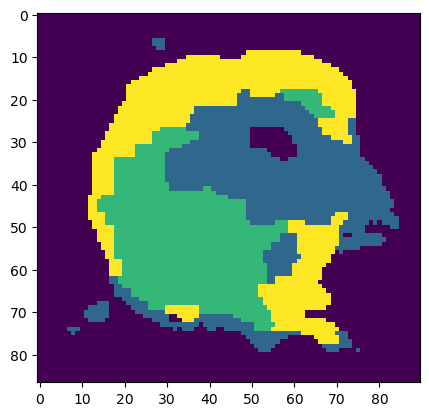

In [20]:
labels = np.zeros(img_1.shape[:-1])
labels[seg_1] = cluster_model.labels_ + 1
plt.imshow(labels)
plt.show()

In [ ]:
#sample_one = "tmz_1_tumor_brain_3_day_0_0_uM"
#sample_two = "tmz_1_tumor_brain_3_day_5_0_uM_rep_1"

#sample_one = "tmz_2_tumor_brain_3_day_0_1000_uM"
#sample_two = "tmz_2_tumor_brain_3_day_5_1000_uM_rep_2"

#sample_one = "tmz_tumor_brain_4_day_0_0_uM"
#sample_two = "tmz_tumor_brain_4_day_5_0_uM_rep_2"

#sample_one = "tmz_tumor_brain_4_day_0_1000_uM"
#sample_two = "tmz_tumor_brain_4_day_5_1000_uM_rep_3"

#sample_one = "tmz_tumor_brain_5_day_0_0_uM"
#sample_two = "tmz_tumor_brain_5_day_5_0_uM_rep_3"

sample_one = "tmz_2_tumor_brain_5_day_0_1000_uM"
sample_two = "tmz_2_tumor_brain_5_day_5_1000_uM_rep_1"
sample_three = "tmz_2_tumor_brain_5_day_5_1000_uM_rep_2"
sample_four = "tmz_2_tumor_brain_5_day_5_1000_uM_rep_3"

img_1, mzs_1, seg_1, labels_1 = read_image_info(sample_one)
img_2, mzs_2, seg_2, labels_2 = read_image_info(sample_two)
img_3, mzs_3, seg_3, labels_3 = read_image_info(sample_three)
img_4, mzs_4, seg_4, labels_4 = read_image_info(sample_four)

In [ ]:
scaler_1 = MinMaxScaler(clip=True).fit(img_1[seg_1])
scaler_2 = MinMaxScaler(clip=True).fit(img_2[seg_2])

In [ ]:
from sklearn.manifold import TSNE


def plot_tsne(data, labels):
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(3)]

  # Create and fit the t-SNE model
  tsne = TSNE(n_components=2, random_state=42)
  tsne_result = tsne.fit_transform(data)

  # Create a DataFrame to easily handle the results and labels
  df_tsne = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])

  df_tsne['Label'] = labels

  # Plot the t-SNE results
  plt.figure(figsize=(10, 7))
  for label in df_tsne['Label'].unique():
    subset = df_tsne[df_tsne['Label'] == label]
    plt.scatter(
        subset['Component 1'],
        subset['Component 2'],
        label=label,
        #color=selected_colors[int(label) - 1]
    )

  plt.title('t-SNE plot')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.legend()
  plt.show()

In [ ]:
plot_tsne(
    np.concatenate([img_1[seg_1], img_2[seg_2]]),
    np.concatenate(
        [["day_0"] * img_1[seg_1].shape[0], ["day_5"] * img_2[seg_2].shape[0]]
    )
)

In [ ]:
plot_tsne(
    np.concatenate(
        [scaler_1.transform(img_1[seg_1]),
         scaler_2.transform(img_2[seg_2])]
    ),
    np.concatenate(
        [["day_0"] * img_1[seg_1].shape[0], ["day_5"] * img_2[seg_2].shape[0]]
    )
)

In [ ]:
plot_tsne(
    np.concatenate(
        [scaler_1.transform(img_1[seg_1]),
         scaler_2.transform(img_2[seg_2])]
    ),
    np.concatenate(
        [
            list(map(lambda x: f"day_0-{int(x)}", labels_1[seg_1])),
            list(map(lambda x: f"day_5-{int(x)}", labels_2[seg_2]))
        ]
    )
)

In [ ]:
def plot_clusters(label_image, n_clusters=3):
  #
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(n_clusters)]
  colors = np.vstack(([1, 1, 1, 1], selected_colors))
  custom_cmap = ListedColormap(colors)

  #flipped_label_image = np.fliplr(label_image)
  seg_c_map = plt.imshow(label_image, cmap=custom_cmap, vmin=0, vmax=n_clusters)
  cbar = plt.colorbar(
      seg_c_map, ticks=np.arange(1, n_clusters + 1),
      boundaries=np.arange(0.5, n_clusters + 1.5)
  )
  cbar.set_ticklabels(range(1, n_clusters + 1))
  cbar.set_label(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  cbar.outline.set_edgecolor('0.2')
  cbar.ax.tick_params(labelsize=14, width=2.5, color='0.2')
  for l in cbar.ax.get_yticklabels():
    l.set_fontweight('bold')
    l.set_color('0.2')
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
from scipy import stats

corr_all = {}
for cluster_1 in tqdm(range(1, 4)):
  for cluster_2 in tqdm(range(1, 4)):
    img_1_cluster = scaler_1.transform(img_1[labels_1 == cluster_1])
    img_2_cluster = scaler_2.transform(img_2[labels_2 == cluster_2])

    corr, _ = stats.pearsonr(
        np.mean(img_1_cluster, axis=0), np.mean(img_2_cluster, axis=0)
    )

    corr_all[(cluster_1, cluster_2)] = corr

In [ ]:
cluster_map = {}

for cluster_pair, corr in corr_all.items():
  cluster_1, cluster_2 = cluster_pair
  cluster_1_max = cluster_map.get(cluster_1, (-np.inf, None))[0]
  if corr > cluster_1_max:
    cluster_map[cluster_1] = (corr, cluster_2)

print(cluster_map)

In [ ]:
plot_clusters(labels_1)
vectorized_map_values = np.vectorize(lambda x: cluster_map.get(x, [0, 0])[1])
new_labels_2 = vectorized_map_values(labels_2)
plot_clusters(new_labels_2)

In [ ]:
def mz_diff(scaler_1, scaler_2, cluster_1_spectras, cluster_2_spectras, mzs):
  img_1_cluster = scaler_1.transform(cluster_1_spectras)
  img_2_cluster = scaler_2.transform(cluster_2_spectras)

  plt.plot(mzs, np.mean(img_1_cluster, axis=0), label="day_0")
  plt.plot(mzs, np.mean(img_2_cluster, axis=0), alpha=0.5, label="day_5_rep_2")
  plt.legend()
  plt.tight_layout()
  plt.show()

  t_statistic_s = []
  p_values = []

  for idx, mz in tqdm(enumerate(mzs)):
    intensities_1 = img_1_cluster[:, idx]
    intensities_2 = img_2_cluster[:, idx]

    t_statistic, p_value_t = stats.ttest_ind(
        intensities_1, intensities_2, equal_var=False
    )
    t_statistic_s.append(t_statistic)
    p_values.append(p_value_t)

  p_values = np.array(p_values)
  print(
      p_values[np.argsort(p_values)[:100]],
      list(mzs[np.argsort(p_values)[:100]])
  )
  print(f"Number of significant different mz values: {(p_values < 0.05).sum()}")

In [ ]:
def mz_diff(scaler_1, scaler_2, cluster_1_spectras, cluster_2_spectras, mzs):
  img_1_cluster = scaler_1.transform(cluster_1_spectras)
  img_2_cluster = scaler_2.transform(cluster_2_spectras)

  plt.plot(mzs, np.mean(img_1_cluster, axis=0), label="day_0")
  plt.plot(mzs, np.mean(img_2_cluster, axis=0), alpha=0.5, label="day_5_rep_2")
  plt.legend()
  plt.tight_layout()
  plt.show()

  t_statistic_s = []
  p_values = []

  for idx, mz in tqdm(enumerate(mzs)):
    intensities_1 = img_1_cluster[:, idx]
    intensities_2 = img_2_cluster[:, idx]

    t_statistic, p_value_t = stats.ttest_ind(
        intensities_1, intensities_2, equal_var=False
    )
    t_statistic_s.append(t_statistic)
    p_values.append(p_value_t)

  p_values = np.array(p_values)
  print(
      p_values[np.argsort(p_values)[:100]],
      list(mzs[np.argsort(p_values)[:100]])
  )
  print(f"Number of significant different mz values: {(p_values < 0.05).sum()}")

In [ ]:
for cluster in np.unique(new_labels_2[seg_2]):
  print(cluster)
  mz_diff(
      scaler_1, scaler_2, img_1[labels_1 == cluster],
      img_2[new_labels_2 == cluster], mzs_1
  )

In [ ]:
corr_all = {}
for cluster_1 in tqdm(range(1, 4)):
  for cluster_2 in tqdm(range(1, 4)):
    img_1_cluster = scaler_1.transform(img_1[labels_1 == cluster_1])
    img_2_cluster = scaler_2.transform(img_2[labels_2 == cluster_2])

    # Compute the mean and standard deviation for each cluster in both images
    mean_1 = np.mean(img_1_cluster, axis=1, keepdims=True)
    mean_2 = np.mean(img_2_cluster, axis=1, keepdims=True)
    std_1 = np.std(img_1_cluster, axis=1, ddof=1, keepdims=True)
    std_2 = np.std(img_2_cluster, axis=1, ddof=1, keepdims=True)

    # Normalize the spectra
    norm_img_1_cluster = (img_1_cluster - mean_1) / std_1
    norm_img_2_cluster = (img_2_cluster - mean_2) / std_2

    # Compute the dot product and divide by the number of elements
    corr_matrix = np.dot(norm_img_1_cluster, norm_img_2_cluster.T
                        ) / (norm_img_1_cluster.shape[1] - 1)

    # Flatten the correlation matrix to get a list of correlations
    corr_all[(cluster_1, cluster_2)] = corr_matrix.flatten().tolist()

In [ ]:
cluster_map = {}

for cluster_pair, corrs in corr_all.items():
  cluster_1, cluster_2 = cluster_pair
  cluster_1_max = cluster_map.get(cluster_1, (-np.inf, None))[0]
  if np.mean(corrs) > cluster_1_max:
    cluster_map[cluster_1] = (np.mean(corrs), cluster_2)

print(cluster_map)

In [ ]:
plot_clusters(labels_1)
vectorized_map_values = np.vectorize(lambda x: cluster_map.get(x, [0, 0])[1])
new_labels_2 = vectorized_map_values(labels_2)
plot_clusters(new_labels_2)

In [ ]:
for cluster in np.unique(new_labels_2[seg_2]):
  print(cluster)
  mz_diff(
      scaler_1, scaler_2, img_1[labels_1 == cluster],
      img_2[new_labels_2 == cluster], mzs_1
  )

In [ ]:
# ------------------------------------------------------

In [2]:
import seaborn as sns
from sklearn.cluster import KMeans


def read_image_info(folder_name):
  msi_path = PROCESSED_DATA / folder_name / 'meaningful_signal.imzML'
  msi_seg = np.load(PROCESSED_DATA / folder_name / "segmentation_new.npy")

  with ImzMLParser(msi_path) as p:
    mzs, img = read_msi(p)
    mzs_filter = (mzs >= 600) & (mzs <= 900)
    img_filter = img[:, :, mzs_filter]

  return img_filter, mzs[mzs_filter], msi_seg


def plot_clusters(label_image, n_clusters=3):
  #
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(n_clusters)]
  colors = np.vstack(([1, 1, 1, 1], selected_colors))
  custom_cmap = ListedColormap(colors)

  #flipped_label_image = np.fliplr(label_image)
  seg_c_map = plt.imshow(label_image, cmap=custom_cmap, vmin=0, vmax=n_clusters)
  cbar = plt.colorbar(
      seg_c_map, ticks=np.arange(1, n_clusters + 1),
      boundaries=np.arange(0.5, n_clusters + 1.5)
  )
  cbar.set_ticklabels(range(1, n_clusters + 1))
  cbar.set_label(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  cbar.outline.set_edgecolor('0.2')
  cbar.ax.tick_params(labelsize=14, width=2.5, color='0.2')
  for l in cbar.ax.get_yticklabels():
    l.set_fontweight('bold')
    l.set_color('0.2')
  plt.axis('off')
  plt.tight_layout()
  plt.show()


def get_sample_name(s):
  if len(s.split("rep_")) > 1:
    return "day_" + s.split("day_")[1].split("_"
                                            )[0] + "_rep_" + s.split("rep_")[1]
  return "day_" + s.split("day_")[1].split("_")[0]

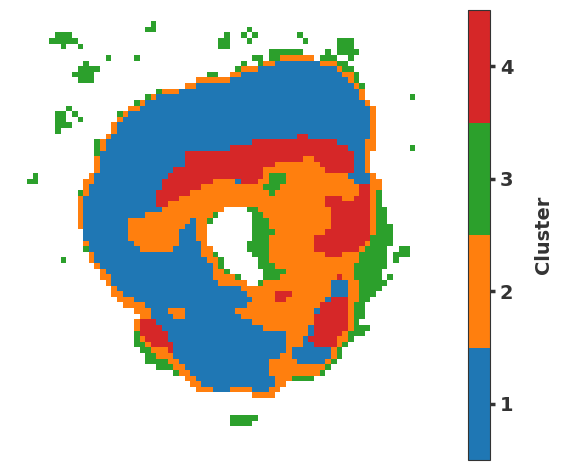

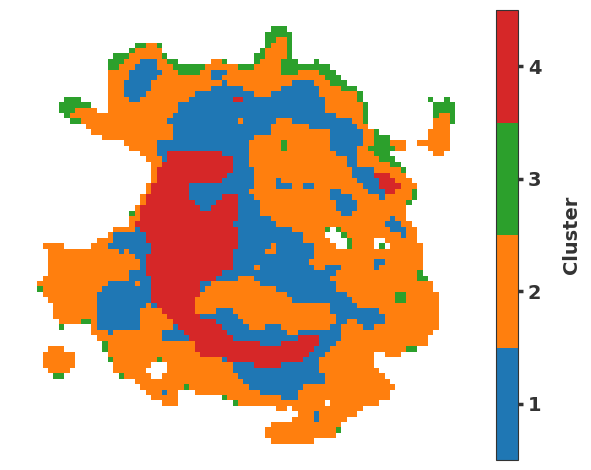

In [3]:
samples_groups = [
    ["tmz_1_tumor_brain_3_day_0_0_uM", "tmz_1_tumor_brain_3_day_5_0_uM_rep_1"],
    [
        "tmz_2_tumor_brain_3_day_0_1000_uM",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_2"
    ], ["tmz_tumor_brain_4_day_0_0_uM", "tmz_tumor_brain_4_day_5_0_uM_rep_2"],
    [
        "tmz_tumor_brain_4_day_0_1000_uM",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_2"
    ], ["tmz_tumor_brain_5_day_0_0_uM", "tmz_tumor_brain_5_day_5_0_uM_rep_3"],
    [
        "tmz_2_tumor_brain_5_day_0_1000_uM",
        "tmz_2_tumor_brain_5_day_5_1000_uM_rep_3"
    ], ["tmz_tumor_brain_6_day_0_0_uM", "tmz_tumor_brain_6_day_5_0_uM_rep_3"],
    [
        "tmz_tumor_brain_6_day_0_1000_uM",
        "tmz_tumor_brain_6_day_5_1000_uM_rep_2"
    ]
]

img_list = []
mzs_list = []
seg_list = []

for sample in samples_groups[0]:
  img, mzs, seg = read_image_info(sample)
  img_list.append(img)
  mzs_list.append(mzs)
  seg_list.append(seg)

gray_matter_mzs_filter = (
    (mzs_list[0] >= 600.51 - 0.025) & (mzs_list[0] <= 600.51 + 0.025)
)
tumour_mzs_filter = (
    (mzs_list[0] >= 682.64 - 0.025) & (mzs_list[0] <= 682.64 + 0.025)
)
white_matter_mzs_filter = (
    (mzs_list[0] >= 888.62 - 0.025) & (mzs_list[0] <= 888.62 + 0.025)
)

mzs_filter = gray_matter_mzs_filter | tumour_mzs_filter | white_matter_mzs_filter

img_smoothed_list = []

for img in img_list:
  img_smoothed = ndimage.gaussian_filter(img, sigma=1)
  img_smoothed_list.append(img_smoothed)

scaler_list = []

for img, seg in zip(img_smoothed_list, seg_list):
  scaler = MinMaxScaler(clip=True).fit(img[seg])
  scaler_list.append(scaler)

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(
    #scaler_list[0].transform(img_smoothed_list[0][seg_list[0]])[:, mzs_filter]
    scaler_list[0].transform(img_smoothed_list[0][seg_list[0]])
)

new_labels_list = []

for img, seg, scaler in zip(img_smoothed_list, seg_list, scaler_list):
  new_labels = np.zeros(img.shape[:-1])
  new_labels[seg] = kmeans.predict(
      #scaler.transform(img[seg])[:, mzs_filter]
      scaler.transform(img[seg])
  ) + 1
  new_labels_list.append(new_labels)
  plot_clusters(new_labels, n_clusters=4)

In [220]:
for label_0 in np.unique(new_labels_list[0]):
  for label_1 in np.unique(new_labels_list[1]):
    if label_0 > 0 and label_1 > 0:
      mean_cluster_vector_0 = scaler_list[0].transform(
          img_smoothed_list[0][seg_list[0]]
      )[new_labels_list[0][seg_list[0]] == label_0].mean(axis=0)
      
      mean_cluster_vector_5 = scaler_list[1].transform(
          img_smoothed_list[1][seg_list[1]]
      )[new_labels_list[1][seg_list[1]] == label_1].mean(axis=0)

      print(label_0, label_1, np.corrcoef(mean_cluster_vector_0, mean_cluster_vector_5)[0,1])

1.0 1.0 0.3154864436904811
1.0 2.0 0.10507552974500017
1.0 3.0 -0.06217102307475505
1.0 4.0 0.21980418019779854
2.0 1.0 0.1620926810760462
2.0 2.0 0.2518145689308754
2.0 3.0 0.25326108002791636
2.0 4.0 -0.07499050606370206
3.0 1.0 0.08971031779346535
3.0 2.0 0.5058794247518081
3.0 3.0 0.6561376862239193
3.0 4.0 -0.5598989855073752
4.0 1.0 0.01392823411307727
4.0 2.0 -0.3636101759668601
4.0 3.0 -0.4972231581526399
4.0 4.0 0.7089403752278406


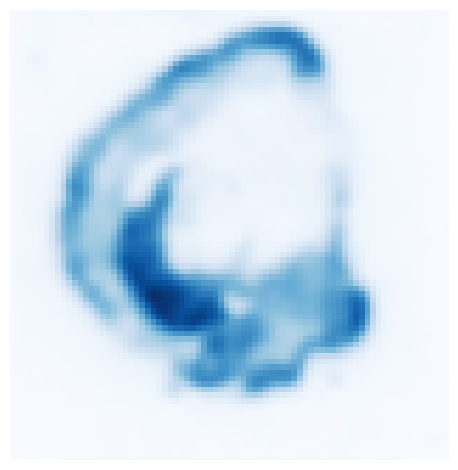

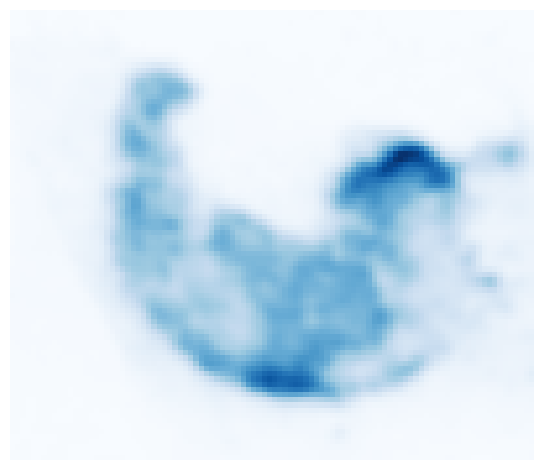

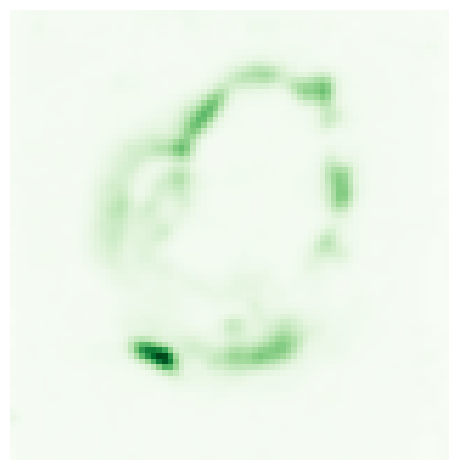

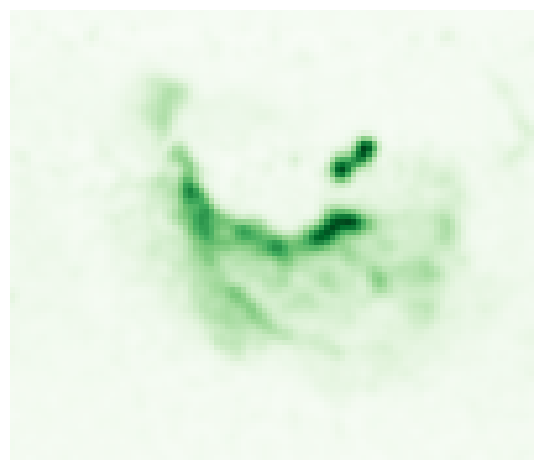

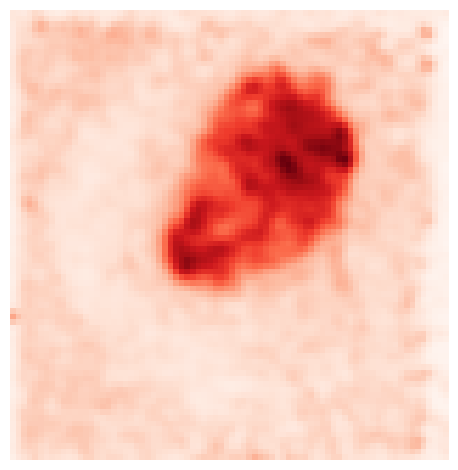

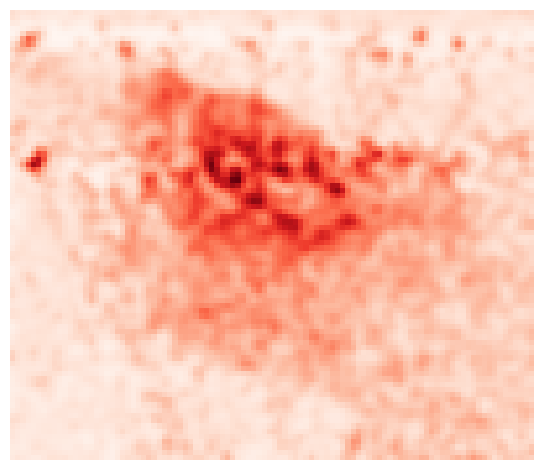

In [23]:
# For each sample, plot its 3 lipids

for color_map, name, loop_filter in zip(
    ["Blues", "Greens", "Reds"], ["gray_matter", "white_matter", "tumour"],
    [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]
):
  for img in img_smoothed_list:
    plot_img = img[:, :, loop_filter].sum(axis=-1)
    plt.imshow(plot_img, cmap=color_map)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [24]:
# Computes and prints the mean cluster vectors filtered by predefined lipids
# (gray matter, white matter, and tumour) for each unique cluster. Determine if
# a cluster belongs to gray matter, white matter, or tumour by highest sum of
# the mean cluster vector elements.

for label in np.unique(new_labels_list[0]):
  if label > 0:
    mean_cluster_vector = scaler_list[0].transform(
        img_smoothed_list[0][seg_list[0]]
    )[new_labels_list[0][seg_list[0]] == label].mean(axis=0)
    for name, loop_filter in zip(
        ["gray_matter", "white_matter", "tumour"],
        [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]
    ):
      print(
          label, name, mean_cluster_vector[loop_filter],
          mean_cluster_vector[loop_filter].sum(), sep=", "
      )

1.0, gray_matter, [0.06677536 0.05892174 0.05750783 0.05768962], 0.24089454941267013
1.0, white_matter, [0.08357972 0.05472326 0.04897957 0.04740394], 0.23468648357058627
1.0, tumour, [0.66272144 0.67168589 0.60362133 0.56335877], 2.5013874271153016
2.0, gray_matter, [0.61143865 0.57899698 0.56928549 0.57383411], 2.333555233067383
2.0, white_matter, [0.07549828 0.06931426 0.06803691 0.0676377 ], 0.2804871481456287
2.0, tumour, [0.10180464 0.11654741 0.12661579 0.15827743], 0.5032452611574832
3.0, gray_matter, [0.28372156 0.26263307 0.2539122  0.25265331], 1.052920136169646
3.0, white_matter, [0.16608987 0.15655048 0.15238448 0.15110347], 0.6261282959046157
3.0, tumour, [0.11195235 0.13412667 0.15662756 0.2141994 ], 0.6169059932711922


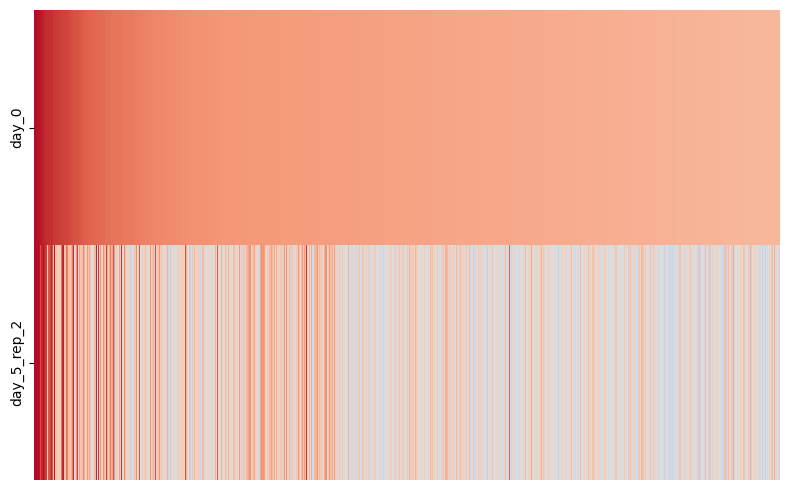

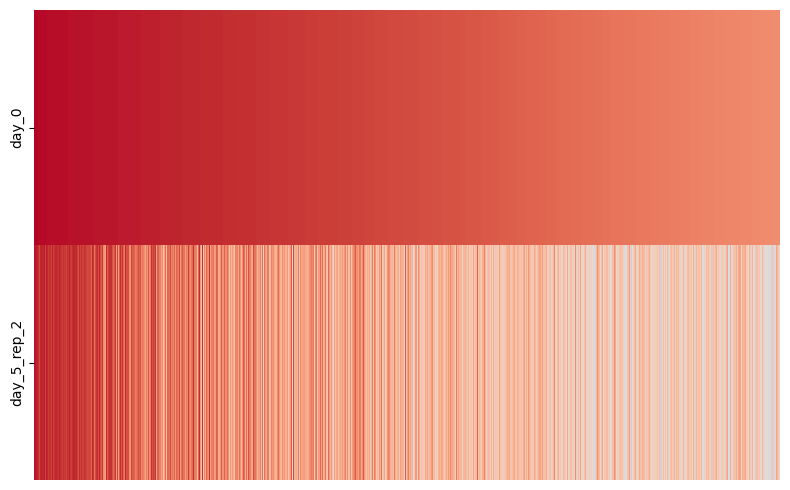

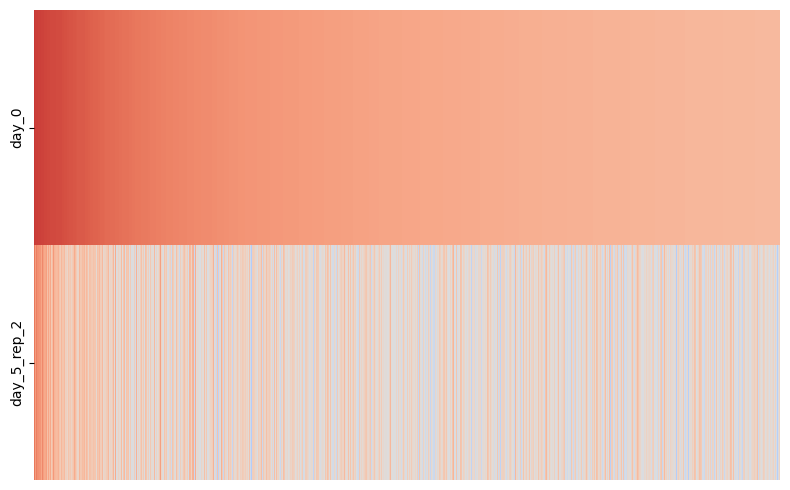

In [27]:
# Analyse the correlation for day 0 and identify the top correlated lipids in
# each cluster group and display correlations change across time. In addition
# store significant changed lipid correlations in a dictionary.

# ["gray_matter", "white_matter", "tumour"]
# [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]

most_correlated_lipids = {}
changed_lipids = {}

for name, label_group, loop_filter in zip(
    ["gray_matter", "white_matter", "tumour"], [[1], [3], [2]],
    [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]
):
  correlation_list = [
      np.corrcoef(
          scaler.transform(img[np.isin(labels, label_group)]), rowvar=False
      ) for img, labels, scaler in
      zip(img_smoothed_list, new_labels_list, scaler_list)
  ]

  average_corr_day_0 = correlation_list[0][loop_filter, :].mean(axis=0)
  sorted_indexes = np.argsort(-average_corr_day_0)
  top_sorted_indexes = [
      idx for idx in sorted_indexes[:1004] if not loop_filter[idx]
  ]

  most_correlated_lipids[name] = list(mzs_list[0][top_sorted_indexes])

  corr_heatmap = np.vstack(
      [
          corr[np.ix_(loop_filter, top_sorted_indexes)].mean(axis=0)
          for corr in correlation_list
      ]
  )

  # Plot the heatmap
  plt.figure(figsize=(8, 5))
  sns.heatmap(
      corr_heatmap, annot=False, cmap='coolwarm',
      yticklabels=[get_sample_name(sample) for sample in samples_groups[7]],
      xticklabels=False, cbar=False, vmax=1, vmin=-1
  )
  plt.tight_layout()
  plt.show()

  diffs = np.abs(corr_heatmap[1] - corr_heatmap[0])

  if len(diffs.shape) > 1:
    diffs = np.mean(diffs, axis=0)

  significant_diffs_idx = np.where(diffs > 0.5)

  significant_diffs_at_idx = diffs[significant_diffs_idx[0]]

  sorted_idx_order = np.argsort(significant_diffs_at_idx)

  sorted_significant_diffs_idx = significant_diffs_idx[0][sorted_idx_order]

  changed_lipids[name] = mzs_list[0][top_sorted_indexes][
      sorted_significant_diffs_idx].tolist()

In [28]:
for key, value in most_correlated_lipids.items():
  print(key, value)

gray_matter [601.51875, 601.53125, 602.50625, 600.54375, 601.50625, 601.54375, 602.51875, 600.55625, 600.48125, 603.51875, 602.49375, 601.55625, 603.53125, 602.53125, 600.56875, 654.58125, 654.56875, 655.58125, 765.58125, 654.59375, 655.56875, 765.56875, 654.55625, 603.50625, 655.59375, 601.56875, 767.56875, 602.54375, 766.58125, 601.49375, 825.51875, 767.58125, 654.60625, 825.53125, 766.56875, 765.55625, 834.54375, 652.55625, 602.55625, 603.54375, 834.53125, 767.55625, 766.59375, 655.60625, 765.59375, 652.56875, 824.51875, 766.55625, 825.50625, 834.55625, 824.50625, 652.54375, 834.51875, 625.51875, 823.51875, 824.53125, 653.56875, 654.54375, 602.56875, 825.54375, 653.55625, 655.55625, 767.59375, 766.54375, 823.53125, 791.55625, 646.48125, 791.54375, 883.48125, 600.46875, 767.54375, 654.61875, 791.56875, 892.49375, 790.55625, 835.54375, 627.53125, 834.50625, 856.53125, 856.51875, 835.53125, 790.56875, 824.49375, 603.55625, 790.54375, 765.54375, 625.50625, 692.44375, 715.56875, 848.5187

In [29]:
for key, value in changed_lipids.items():
  print(key, value)

gray_matter [847.50625, 839.55625, 763.55625, 768.56875, 824.68125, 845.58125, 807.60625, 849.65625, 807.59375, 807.53125, 750.55625, 838.54375, 868.49375, 751.54375, 806.64375, 884.49375, 795.59375, 892.50625, 833.61875, 821.64375, 826.54375, 842.55625, 812.68125, 870.50625, 762.59375, 835.54375, 821.46875, 788.54375, 870.48125, 839.59375, 764.51875, 865.61875, 762.54375, 738.51875, 839.56875, 763.53125, 701.55625, 824.51875, 806.63125, 856.55625, 788.55625, 849.63125, 865.63125, 795.56875, 777.59375, 827.70625, 841.55625, 795.60625, 877.60625, 820.48125, 879.58125, 891.48125, 843.46875, 763.49375, 838.58125, 893.48125, 789.54375, 891.49375, 763.54375, 838.56875, 820.64375, 835.55625, 766.55625, 856.49375, 838.55625, 842.46875, 716.58125, 795.58125, 791.55625, 848.54375, 824.69375, 839.58125, 768.58125, 845.59375, 850.63125, 841.48125, 763.51875, 834.54375, 892.49375, 841.56875, 738.50625, 750.58125, 767.59375, 832.50625, 774.53125, 767.55625, 767.54375, 857.54375, 857.53125, 823.5437

In [10]:
set(changed_lipids["white_matter"]) & set(changed_lipids["tumour"])
set(changed_lipids["gray_matter"]) & set(changed_lipids["tumour"])

{862.56875, 863.55625, 888.58125}

In [15]:
from functools import reduce

common_correlated_lipids = list(
    reduce(lambda x, y: set(x) & set(y), most_correlated_lipids.values())
)
common_changed_lipids = list(
    reduce(lambda x, y: set(x) & set(y), changed_lipids.values())
)
print(common_correlated_lipids)
print(common_changed_lipids)

[]
[]


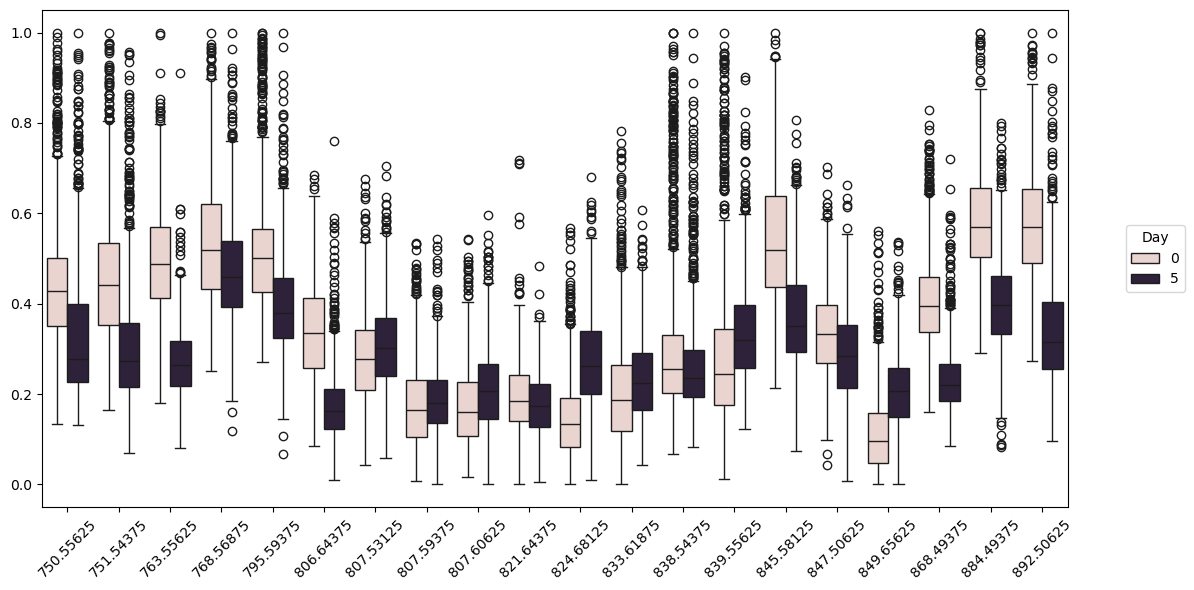

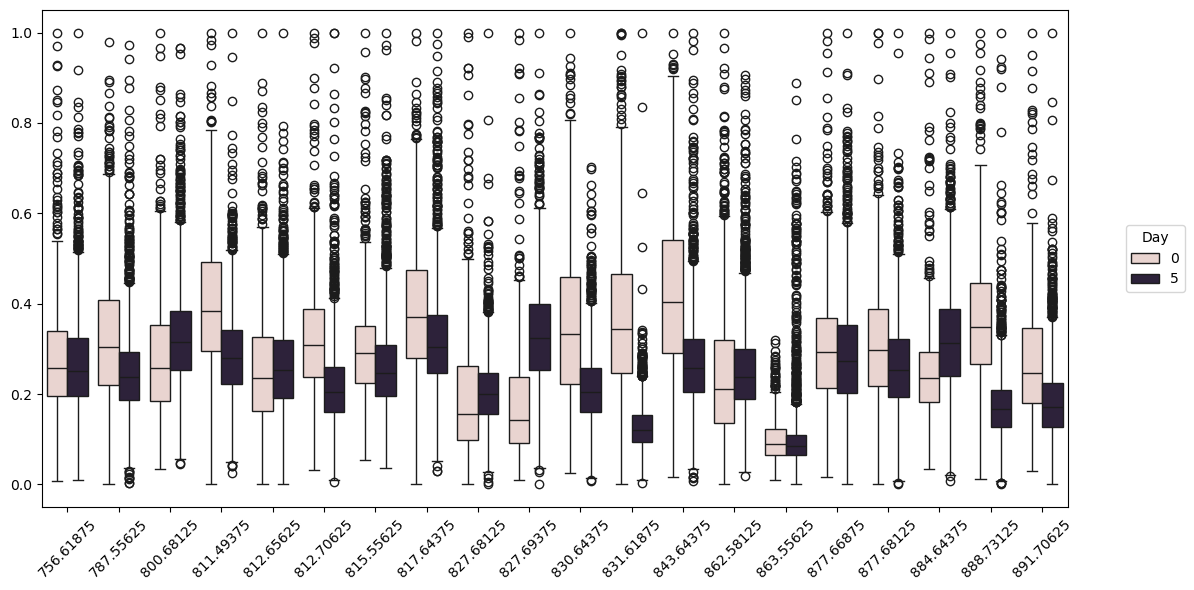

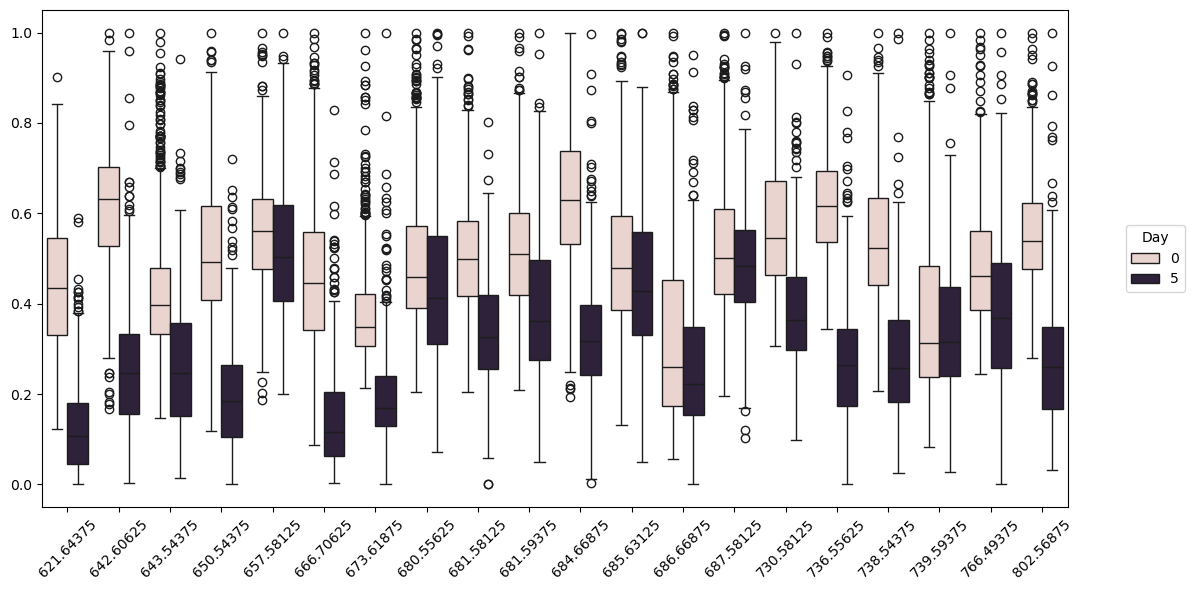

In [30]:
n = 20

for name, label_group, loop_filter in zip(
    ["gray_matter", "white_matter", "tumour"], [[2], [3], [1]],
    [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]
):
  changed_lipids_img_0 = scaler_list[0].transform(
      img_smoothed_list[0][np.isin(new_labels_list[0], label_group)]
  )[:, np.isin(mzs_list[0], changed_lipids[name][:n])]
  changed_lipids_img_5 = scaler_list[1].transform(
      img_smoothed_list[1][np.isin(new_labels_list[1], label_group)]
  )[:, np.isin(mzs_list[1], changed_lipids[name][:n])]
  df_0 = pd.DataFrame(
      changed_lipids_img_0,
      columns=mzs_list[0][np.isin(mzs_list[0], changed_lipids[name][:n])]
  )
  df_0["day"] = 0
  df_5 = pd.DataFrame(
      changed_lipids_img_5,
      columns=mzs_list[1][np.isin(mzs_list[1], changed_lipids[name][:n])]
  )
  df_5["day"] = 5
  plt.figure(figsize=(12, 6))
  ax = sns.boxplot(
      x="variable", y="value", hue="day",
      data=pd.melt(pd.concat([df_0, df_5]), id_vars="day")
  )
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  plt.yticks(rotation=0)
  plt.xticks(rotation=45)
  plt.ylabel("")
  plt.xlabel("")
  plt.legend(title="Day", loc='center left', bbox_to_anchor=(1.05, 0.5))
  plt.tight_layout()
  plt.show()

In [ ]:
# consider the possibility of new lipid markers emerging on day 5 that were not
# significant on day 0. Including a mechanism to detect new significant
# correlations on day 5 might provide additional insights.

# A correlation change greater than 0.5 is a reasonable threshold for
# significance. You might want to include a statistical significance test
# (e.g., permutation testing) to validate that these changes are not due to
# random fluctuations.


In [16]:
import re
import joblib
from functools import reduce

samples_clusters = [
  [[1],[3],[2]],
  [[3],[2],[1]],
  [[1],[3],[2]],
  [[1],[2],[3]],
  [[2],[1],[3]],
  [[1, 2],[],[3]],
  [[2],[1],[3]],
  [[1],[3],[2]],
  [[2],[3],[1]]
]

correlations = {}

for samples, clusters in tqdm(zip(samples_groups, samples_clusters)):
  img_list = []
  mzs_list = []
  seg_list = []

  for sample in samples:
    img, mzs, seg = read_image_info(sample)
    img_list.append(img)
    mzs_list.append(mzs)
    seg_list.append(seg)
  
  img_smoothed_list = []

  for img in img_list:
    img_smoothed = ndimage.gaussian_filter(img, sigma=1)
    img_smoothed_list.append(img_smoothed)

  img_smoothed_scaled_list = []

  for img, seg in zip(img_smoothed_list, seg_list):
    img_smoothed_scaled = np.zeros_like(img)
    img_smoothed_scaled[seg] = MinMaxScaler(clip=True).fit_transform(img[seg])
    img_smoothed_scaled_list.append(img_smoothed_scaled)

  img_smoothed_scaled_with_res_list = []
  for img in img_smoothed_scaled_list:
    img_smoothed_scaled_with_res = np.zeros_like(img)
    for i, mz in enumerate(mzs_list[0]):
      mzs_mask = (mzs_list[0] >= mz - 0.025) & (mzs_list[0] <= mz + 0.025)
      img_smoothed_scaled_with_res[:, :, i] = np.sum(img[:, :, mzs_mask], axis=-1)
    img_smoothed_scaled_with_res_list.append(img_smoothed_scaled_with_res)

  f_path = Path("./longitudinal/kmeans/")
  split_text = re.split(r"(day_\d+_)", samples[0])
  model_path = f_path / ("".join([split_text[0], split_text[-1]]) + ".pkl")
  kmeans = joblib.load(model_path)

  new_labels_list = []

  for img, seg in zip(img_smoothed_scaled_list, seg_list):
    new_labels = np.zeros(img.shape[:-1])
    new_labels[seg] = kmeans.predict(
        img[seg][:, mzs_filter]
    ) + 1
    new_labels_list.append(new_labels)
  
  for name, cluster, loop_filter in zip(
    ["gray_matter", "white_matter", "tumour"], clusters,
    [gray_matter_mzs_filter, white_matter_mzs_filter, tumour_mzs_filter]
  ):
    if cluster != []:
      for sample, img, labels in zip(samples, img_smoothed_scaled_with_res_list, new_labels_list):
        correlation = np.corrcoef(
            img[np.isin(labels, cluster)], rowvar=False
        )
        
        correlations[sample + "_" + name] = correlation[loop_filter, :].mean(axis=0)
    
pd.DataFrame(correlations, index=mzs_list[0]).to_csv("cluster_lipids_correlation_to_cluster_lipid.csv")

0it [00:00, ?it/s]

In [ ]:
# For each brain_treatment - calculate how day 0 and day 5 significant lipid by
# seeing which lipids have a correlation change zscore greater than 2
# this assumes diff can change between brains and treatments so we need to
# define significant changes for each brain_treatment

# For each brain calculate the correlation change between day 0 and day 5 and
# then see between treatment and no treatment if its signicant

# Look at indexes that have always 0 in the no treatment column but may have 1
# in the treatment column - might be having a unique effect. 

# 

In [88]:
# Load the CSV file
file_path = 'cluster_lipids_correlation_to_cluster_lipid.csv'
data = pd.read_csv(file_path, index_col=0)

# Extract information from column names
extracted_info = []
for column in data.columns:
    parts = column.split("_")
    if parts[1] == "tumor":
        parts.insert(1, None)
    
    if len(parts) >= 12:
        brain_id = parts[4]
        day_id = parts[6]
        treatment_concentration = parts[7]
        area = "_".join(parts[11:])
        extracted_info.append([column, brain_id, day_id, treatment_concentration, area])
    
    elif len(parts) >= 10:
        brain_id = parts[4]
        day_id = parts[6]
        treatment_concentration = parts[7]
        area = "_".join(parts[9:])
        extracted_info.append([column, brain_id, day_id, treatment_concentration, area])

    else:
      print(column)

# Convert extracted information into a DataFrame
extracted_df_final = pd.DataFrame(extracted_info, columns=["Original Column", "Brain ID", "Day ID", "Treatment Concentration", "Area"])

In [89]:
tumour_extracted_df_final = extracted_df_final[extracted_df_final["Area"] == "tumour"]

corr_diff = {}

for (brain_id, concentration), group in tumour_extracted_df_final.groupby(["Brain ID", "Treatment Concentration"]):
    day_0_column = group[group["Day ID"] == "0"]["Original Column"].iloc[0]
    day_5_column = group[group["Day ID"] == "5"]["Original Column"].iloc[0]
    
    #significant_lipids[brain_id + "_" + concentration] = data.index[((data[day_0_column].values - data[day_5_column].values) > 0.5).flatten()].to_numpy()
    corr_diff[brain_id + "_" + concentration] = np.abs(data[day_0_column].values - data[day_5_column].values)

In [90]:
clusters_area = ["gray_matter", "white_matter", "tumour"]

for cluster_area in clusters_area:
  for (brain_id, concentration), group in extracted_df_final[extracted_df_final["Area"] == cluster_area].groupby(["Brain ID", "Treatment Concentration"]):
    day_0_column = group[group["Day ID"] == "0"]["Original Column"].iloc[0]
    day_5_column = group[group["Day ID"] == "5"]["Original Column"].iloc[0]
    
    data[f"{cluster_area}_days_correlation_diff_{brain_id}_{concentration}"] = data[day_0_column].values - data[day_5_column].values

In [91]:
for col in data.columns:
  if 'correlation_diff' in col:
    differences  = np.abs(data[col].to_numpy())
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)
    data[f"{col}_zscore"] =  (differences - mean_diff) / std_diff

In [92]:
data.columns

Index(['tmz_1_tumor_brain_3_day_0_0_uM_gray_matter',
       'tmz_1_tumor_brain_3_day_5_0_uM_rep_1_gray_matter',
       'tmz_1_tumor_brain_3_day_0_0_uM_white_matter',
       'tmz_1_tumor_brain_3_day_5_0_uM_rep_1_white_matter',
       'tmz_1_tumor_brain_3_day_0_0_uM_tumour',
       'tmz_1_tumor_brain_3_day_5_0_uM_rep_1_tumour',
       'tmz_2_tumor_brain_3_day_0_1000_uM_gray_matter',
       'tmz_2_tumor_brain_3_day_5_1000_uM_rep_2_gray_matter',
       'tmz_2_tumor_brain_3_day_0_1000_uM_white_matter',
       'tmz_2_tumor_brain_3_day_5_1000_uM_rep_2_white_matter',
       'tmz_2_tumor_brain_3_day_0_1000_uM_tumour',
       'tmz_2_tumor_brain_3_day_5_1000_uM_rep_2_tumour',
       'tmz_tumor_brain_4_day_0_0_uM_gray_matter',
       'tmz_tumor_brain_4_day_5_0_uM_rep_2_gray_matter',
       'tmz_tumor_brain_4_day_0_0_uM_white_matter',
       'tmz_tumor_brain_4_day_5_0_uM_rep_2_white_matter',
       'tmz_tumor_brain_4_day_0_0_uM_tumour',
       'tmz_tumor_brain_4_day_5_0_uM_rep_2_tumour',
       'tm

In [93]:
no_treatment_cols = [i for i in data.columns if "_0" in i and '_zscore' in i]
treatment_cols = [i for i in data.columns if "_1000" in i and '_zscore' in i]

In [94]:
tumour_no_treatment_cols = [i for i in no_treatment_cols if "tumour" in i]
tumour_treatment_cols = [i for i in treatment_cols if "tumour" in i]

In [97]:
no_treatment_cols

['gray_matter_days_correlation_diff_3_0_zscore',
 'gray_matter_days_correlation_diff_4_0_zscore',
 'gray_matter_days_correlation_diff_5_0_zscore',
 'gray_matter_days_correlation_diff_6_0_zscore',
 'white_matter_days_correlation_diff_3_0_zscore',
 'white_matter_days_correlation_diff_4_0_zscore',
 'white_matter_days_correlation_diff_5_0_zscore',
 'white_matter_days_correlation_diff_6_0_zscore',
 'tumour_days_correlation_diff_3_0_zscore',
 'tumour_days_correlation_diff_4_0_zscore',
 'tumour_days_correlation_diff_5_0_zscore',
 'tumour_days_correlation_diff_6_0_zscore']

In [95]:
tumour_no_treatment_cols

['tumour_days_correlation_diff_3_0_zscore',
 'tumour_days_correlation_diff_4_0_zscore',
 'tumour_days_correlation_diff_5_0_zscore',
 'tumour_days_correlation_diff_6_0_zscore']

In [99]:
(data[tumour_no_treatment_cols] > 2).sum(axis=1).max()

4

In [79]:
thresh = 0.6

tumour_extracted_df_final = extracted_df_final[extracted_df_final["Area"] == "tumour"]

significant_lipids = {}

for (brain_id, concentration), group in tumour_extracted_df_final.groupby(["Brain ID", "Treatment Concentration"]):
    day_0_column = group[group["Day ID"] == "0"]["Original Column"].iloc[0]
    day_5_column = group[group["Day ID"] == "5"]["Original Column"].iloc[0]
    
    #significant_lipids[brain_id + "_" + concentration] = data.index[((data[day_0_column].values - data[day_5_column].values) > 0.5).flatten()].to_numpy()
    print(data.index[(np.abs(data[day_0_column].values - data[day_5_column].values) > thresh).flatten()].to_numpy().shape)
    significant_lipids[brain_id + "_" + concentration] = data.index[(np.abs(data[day_0_column].values - data[day_5_column].values) > thresh).flatten()].to_numpy()

significant_lipids_with_mass_res = {}

for key, value in significant_lipids.items():
  new_value = []
  for lipid in value:
    new_value.extend(list(mzs_list[0][(mzs_list[0] >= lipid - 0.025) & (mzs_list[0] <= lipid + 0.025)]))
  significant_lipids_with_mass_res[key] = list(set(new_value))

all_significant_lipids = np.asarray(list(set(reduce(lambda x, y: list(x) +  list(y), significant_lipids_with_mass_res.values()))))

common_significant_lipids = {}

for key, value in significant_lipids_with_mass_res.items():
  common_significant_lipids[key] = np.isin(all_significant_lipids, value).astype(int)

common_significant_lipids_df = pd.DataFrame(common_significant_lipids, index=all_significant_lipids)

(1470,)
(154,)
(1180,)
(325,)
(472,)
(215,)
(102,)
(72,)


In [ ]:
(3138,)
(477,)
(3638,)
(826,)
(1128,)
(609,)
(543,)
(202,)

In [73]:
no_treatment_cols = [key for key in significant_lipids_with_mass_res.keys() if key.split("_")[1] == "0"]
treatment_cols = [key for key in significant_lipids_with_mass_res.keys() if key.split("_")[1] == "1000"]
no_treatment_cols, treatment_cols

(['3_0', '4_0', '5_0', '6_0'], ['3_1000', '4_1000', '5_1000', '6_1000'])

In [74]:
common_significant_lipids_df["num_significant_in_non_treated_brains"] = common_significant_lipids_df[no_treatment_cols].sum(axis=1)
common_significant_lipids_df["num_significant_in_treated_brains"] = common_significant_lipids_df[treatment_cols].sum(axis=1)
common_significant_lipids_df["num_significant_in_all_brains"] = common_significant_lipids_df[no_treatment_cols + treatment_cols].sum(axis=1)

changed_in_0_not_in_1000 = 0
for no_treatment_col, treatment_col in zip(no_treatment_cols, treatment_cols):
  changed_in_0_not_in_1000 += ((common_significant_lipids_df[no_treatment_col] == 0) & (common_significant_lipids_df[treatment_col]==1))
common_significant_lipids_df["num_significant_in_treated_brains_and_not_in_non_treated_brains"] = changed_in_0_not_in_1000

In [75]:
common_significant_lipids_df["label"] = ""
common_significant_lipids_df.loc[common_significant_lipids_df["num_significant_in_non_treated_brains"] == 4, "label"] = "Changed due to time"
common_significant_lipids_df.loc[common_significant_lipids_df["num_significant_in_all_brains"] >= 6, "label"] = "Changed due to time"
common_significant_lipids_df.loc[common_significant_lipids_df["num_significant_in_treated_brains_and_not_in_non_treated_brains"] >= 3, "label"] = "Changed due to treatment"

In [76]:
common_significant_lipids_df[common_significant_lipids_df["label"] == "Changed due to treatment"]

,3_0,3_1000,4_0,4_1000,5_0,5_1000,6_0,6_1000,num_significant_in_non_treated_brains,num_significant_in_treated_brains,num_significant_in_all_brains,num_significant_in_treated_brains_and_not_in_non_treated_brains,label
755.59375,0,1,0,1,0,1,0,0,0,3,3,3,Changed due to treatment
776.66875,0,1,0,1,0,1,0,0,0,3,3,3,Changed due to treatment
776.69375,0,1,0,1,0,1,0,0,0,3,3,3,Changed due to treatment
776.68125,0,1,0,1,0,1,0,0,0,3,3,3,Changed due to treatment
776.70625,0,1,0,1,0,1,0,0,0,3,3,3,Changed due to treatment


In [46]:
common_significant_lipids_df.sort_index().to_csv(f"common_significant_lipids_{thresh}.csv", index=False)

In [ ]:
# -----------------------------------------------------------------------------

In [ ]:
def get_folder_cluster_vecs(folder_name):
  msi_path = PROCESSED_DATA / folder_name / 'meaningful_signal.imzML'
  msi_seg = np.load(PROCESSED_DATA / folder_name / "segmentation_new.npy")
  hca_path = Path(
      "."
  ) / "longitudinal" / "hca_gaussian_smoothing" / f"{folder_name}_hca.pkl"

  with ImzMLParser(msi_path) as p:
    mzs, img = read_msi(p)
    mzs_filter = (mzs >= 600) & (mzs <= 900)
    img_filter = img[:, :, mzs_filter]

  with open(hca_path, 'rb') as f:
    model = pickle.load(f)

  label_image = np.zeros(img.shape[:-1])
  label_image[msi_seg] = model.labels_ + 1

  clusters_vec = {}
  for i in np.unique(model.labels_ + 1):
    clusters_vec[i] = img_filter[label_image == i].mean(axis=0)
  return clusters_vec, mzs[mzs_filter]

In [ ]:
groups = [
    [
        "tmz_1_tumor_brain_1_day_0_0_uM",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_1",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_2",
        "tmz_1_tumor_brain_1_day_5_0_uM_rep_3"
    ],
    [
        "tmz_2_tumor_brain_1_day_0_0_uM",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_1",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_2",
        "tmz_2_tumor_brain_1_day_5_0_uM_rep_3"
    ],
    [
        "tmz_1_tumor_brain_1_day_0_1000_uM",
        "tmz_1_tumor_brain_1_day_5_1000_uM_rep_1",
        "tmz_1_tumor_brain_1_day_5_1000_uM_rep_2"
    ],
    [
        "tmz_2_tumor_brain_1_day_0_1000_uM",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_1",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_2",
        "tmz_2_tumor_brain_1_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_2_day_0_0_uM", "tmz_tumor_brain_2_day_5_0_uM_rep_1",
        "tmz_tumor_brain_2_day_5_0_uM_rep_2",
        "tmz_tumor_brain_2_day_5_0_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_2_day_0_1000_uM",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_1",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_2",
        "tmz_tumor_brain_2_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_1_tumor_brain_3_day_0_0_uM",
        "tmz_1_tumor_brain_3_day_5_0_uM_rep_1",
        "tmz_1_tumor_brain_3_day_5_0_uM_rep_2"
    ],
    ["tmz_2_tumor_brain_3_day_0_0_uM", "tmz_2_tumor_brain_3_day_5_0_uM_rep_1"],
    [
        "tmz_1_tumor_brain_3_day_0_1000_uM",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_1",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_2",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_3",
        "tmz_1_tumor_brain_3_day_5_1000_uM_rep_4"
    ],
    [
        "tmz_2_tumor_brain_3_day_0_1000_uM",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_1",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_2",
        "tmz_2_tumor_brain_3_day_5_1000_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_4_day_0_0_uM", "tmz_tumor_brain_4_day_5_0_uM_rep_1",
        "tmz_tumor_brain_4_day_5_0_uM_rep_2",
        "tmz_tumor_brain_4_day_5_0_uM_rep_3"
    ],
    [
        "tmz_tumor_brain_4_day_0_1000_uM",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_1",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_2",
        "tmz_tumor_brain_4_day_5_1000_uM_rep_3"
    ]
]

In [ ]:
clusters_1, mzs = get_folder_cluster_vecs("tmz_tumor_brain_4_day_0_0_uM")

In [ ]:
clusters_2, mzs = get_folder_cluster_vecs("tmz_tumor_brain_4_day_5_0_uM_rep_2",)

In [ ]:
img_1, mzs_1, seg_1, labels_1 = read_image_info("tmz_tumor_brain_4_day_0_0_uM")
img_2, mzs_2, seg_2, labels_2 = read_image_info(
    "tmz_tumor_brain_4_day_5_0_uM_rep_2"
)

In [ ]:
array1 = img_1[seg_1]
array2 = img_2[seg_2]

norm_array1 = (array1 - array1.mean(axis=1, keepdims=True)
              ) / array1.std(axis=1, keepdims=True)
norm_array2 = (array2 - array2.mean(axis=1, keepdims=True)
              ) / array2.std(axis=1, keepdims=True)

correlation_matrix = np.dot(norm_array1, norm_array2.T) / norm_array1.shape[1]

In [ ]:
labels_array1 = labels_1[seg_1]

weighted_labels = np.dot(correlation_matrix.T,
                         labels_array1) / np.sum(correlation_matrix.T, axis=1)


In [ ]:
assigned_labels = np.round(weighted_labels).astype(int)

In [ ]:
def plot_clusters(labels, mask, original_shape):
  #
  n_clusters = 3

  #
  tab10_cmap = plt.get_cmap('tab10')
  selected_colors = [tab10_cmap(i) for i in range(n_clusters)]
  colors = np.vstack(([1, 1, 1, 1], selected_colors))
  custom_cmap = ListedColormap(colors)

  # Reshape labels to original image shape
  label_image = np.zeros(original_shape)
  label_image[mask] = labels
  seg_c_map = plt.imshow(label_image, cmap=custom_cmap, vmin=0, vmax=n_clusters)
  cbar = plt.colorbar(
      seg_c_map, ticks=np.arange(1, n_clusters + 1),
      boundaries=np.arange(0.5, n_clusters + 1.5)
  )
  cbar.set_ticklabels(range(1, n_clusters + 1))
  cbar.set_label(
      'Cluster', labelpad=15, fontweight='bold', fontsize=14, color='0.2'
  )
  cbar.outline.set_edgecolor('0.2')
  cbar.ax.tick_params(labelsize=14, width=2.5, color='0.2')
  for l in cbar.ax.get_yticklabels():
    l.set_fontweight('bold')
    l.set_color('0.2')
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
plot_clusters(assigned_labels, seg_2, seg_2.shape)

In [ ]:
for folder in PROCESSED_DATA.iterdir():
  if 'tmz' in folder.name and "tumor" in folder.name and 'brain_5' in folder.name:
    print(f"Working {folder.name}")

In [ ]:
stacked1 = np.stack([arr.flatten() for arr in img_1[]])
stacked2 = np.stack([arr.flatten() for arr in list2])

In [ ]:
list1 = [np.random.rand(2, 4), np.random.rand(2, 4), np.random.rand(2, 4)]
list2 = [np.random.rand(2, 4), np.random.rand(2, 4), np.random.rand(2, 4)]

# Flatten and concatenate the arrays within each list
concatenated1 = np.concatenate([arr.flatten() for arr in list1])
concatenated2 = np.concatenate([arr.flatten() for arr in list2])

# Calculate the correlation
correlation_matrix = np.corrcoef(concatenated1, concatenated2)

In [ ]:
# Flatten and stack the arrays within each list
stacked1 = np.stack([arr.flatten() for arr in list1])
stacked2 = np.stack([arr.flatten() for arr in list2])

# Normalize the arrays to have zero mean and unit variance
stacked1 = (stacked1 - stacked1.mean(axis=1, keepdims=True)
           ) / stacked1.std(axis=1, keepdims=True)
stacked2 = (stacked2 - stacked2.mean(axis=1, keepdims=True)
           ) / stacked2.std(axis=1, keepdims=True)

# Compute the correlation matrix
correlation_matrix = np.dot(stacked1, stacked2.T) / stacked1.shape[1]

correlation_matrix

In [ ]:
clusters_1_df = pd.DataFrame(clusters_1, index=mzs)
clusters_2_df = pd.DataFrame(clusters_2, index=mzs)

In [ ]:
correlation_matrix = np.corrcoef(
    clusters_1_df.values.T, clusters_2_df.values.T
)[0:clusters_1_df.shape[1], clusters_1_df.shape[1]:]

# Convert to DataFrame for better readability
correlations = pd.DataFrame(
    correlation_matrix, index=clusters_1_df.columns,
    columns=clusters_2_df.columns
)

print(correlations)

In [ ]:
clusters_scaled = {
    key: ((spectra - spectra.min()) / (spectra.max() - spectra.min()))
    for key, spectra in clusters.items()
}

In [ ]:
heatmap_df = pd.DataFrame(clusters_scaled, index=mzs)
heatmap_df

In [ ]:
cols = ["Day_0-1", "Day_0-2", "Day_0-3"]
for rep in range(int(heatmap_data.shape[-1] / 3) - 1):
  cols.extend([f"Day_5_{rep+1}-1", f"Day_5_{rep+1}-2", f"Day_5_{rep+1}-3"])

heatmap_df = pd.DataFrame(heatmap_data, index=unique_mz_values, columns=cols)

In [ ]:
folder_name = groups[0][3]
msi_path = PROCESSED_DATA / folder_name / 'meaningful_signal.imzML'
msi_seg = np.load(PROCESSED_DATA / folder_name / "segmentation_new.npy")
hca_path = Path(
    "."
) / "longitudinal" / "hca_gaussian_smoothing" / f"{folder_name}_hca.pkl"

with ImzMLParser(msi_path) as p:
  mzs, img = read_msi(p)
  #mzs_filter = np.isin(mzs, unique_mz_values)
  mzs_filter = (mzs >= 600) & (mzs <= 900)
  img_filter = img[:, :, mzs_filter]
  smoothed_img = ndimage.gaussian_filter(img_filter, sigma=0.5)

with open(hca_path, 'rb') as f:
  model = pickle.load(f)

In [ ]:
cols = [1, 2, 3]
#cols = ["Day_0-1", "Day_0-2", "Day_0-3"]

labels = []
for pixel in smoothed_img[msi_seg]:
  labels.append(
      heatmap_df.loc[:, cols].apply(lambda col: np.corrcoef(col, pixel)[0, 1]
                                   ).idxmax()  #.replace("Day_0-", "")
  )

In [ ]:
plot_clusters(labels, msi_seg, img_filter.shape[:-1])

In [ ]:
label_image = np.zeros(img_filter.shape[:-1])
label_image[msi_seg] = model.labels_ + 1

In [ ]:
label_image = np.zeros(img_filter.shape[:-1])
label_image[msi_seg] = ~((model.labels_ + 1) == np.array(labels).astype(int))

plt.imshow(label_image, cmap='gray')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# ANOVA across clusters for each feature
f_values, p_values = f_oneway(
    img_filter[label_image == 1], img_filter[label_image == 2],
    img_filter[label_image == 3]
)

significant_features = np.where(p_values < 0.05)[0]

print("Number of significant features:", len(significant_features))
print("Indices of significant features:", mzs[mzs_filter][significant_features])

In [ ]:
significant_features_indices = np.argsort(p_values)[:100]


In [ ]:
print("Indices of significant features:", mzs[mzs_filter][significant_features])

In [ ]:
import seaborn as sns

for cluster in [1, 2, 3]:  # Visualize first 10 significant features
  sns.lineplot(
      y=clusters[cluster][significant_features_indices],
      x=mzs[mzs_filter][significant_features_indices]
  )

plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.show()

In [ ]:
img_filter.shape

In [ ]:
label_image.shape

In [ ]:
model.labels_.shape

In [ ]:
(().sum()

In [ ]:
for folder_name in group:
  print(folder_name)

In [ ]:
b.split("_")[2]

In [ ]:
one = "tmz_1_tumor_brain_3_day_0_0_uM"
two = "tmz_1_tumor_brain_3_day_5_0_uM_rep_1"
three = "tmz_1_tumor_brain_3_day_5_0_uM_rep_2"

clusters_vec_one = get_folder_cluster_vecs(one)
clusters_vec_two = get_folder_cluster_vecs(two)

In [ ]:
three = "tmz_1_tumor_brain_3_day_5_0_uM_rep_2"
clusters_vec_three = get_folder_cluster_vecs(three)

In [ ]:
for i, (label_i, vec_i) in enumerate(clusters_vec_three.items()):
  max_corr = np.nan
  max_label = 0
  for j, (label_j, vec_j) in enumerate(clusters_vec_two.items()):
    corr_i_j = np.corrcoef(vec_i, vec_j)[0, 1]
    if np.isnan(max_corr) or max_corr < corr_i_j:
      max_corr = corr_i_j
      max_label = label_j
  print(label_i, max_label, max_corr)

In [ ]:
org = "tmz_1_tumor_brain_3_day_0_0_uM"
msi_path = PROCESSED_DATA / org / 'meaningful_signal.imzML'
msi_seg = np.load(PROCESSED_DATA / org / "segmentation_new.npy")
hca_path = Path(".") / "longitudinal" / "hca" / f"{org}_hca.pkl"

with ImzMLParser(msi_path) as p:
  mzs, img = read_msi(p)
  mzs_filter = (mzs >= 600) & (mzs <= 900)
  img_filter = img[:, :, mzs_filter]

with open(hca_path, 'rb') as f:
  model = pickle.load(f)

In [ ]:
label_image = np.zeros(img.shape[:-1])
label_image[msi_seg] = model.labels_ + 1

In [ ]:
clusters_vec = {}
for i in np.unique(model.labels_ + 1):
  clusters_vec[i] = img_filter[label_image == i].mean(axis=0)

In [ ]:
num_clusters = len(clusters_vec)
correlations = np.zeros((img_filter[msi_seg].shape[0], num_clusters))

# Normalize the spectra and compute the correlations
for i, (label, vec) in enumerate(clusters_vec.items()):
  correlations[:, i] = np.corrcoef(img_filter[msi_seg],
                                   clusters_vec[label].T)[0][1:]

In [ ]:
new_labels = np.zeros(img_filter[msi_seg].shape[:-1])

for pixel_index, pixel in enumerate(img_filter[msi_seg]):
  corr = np.nan
  pixel_label = 0
  for i, (label, vec) in enumerate(clusters_vec.items()):
    corr_label = np.corrcoef(vec, pixel)[0, 1]
    if np.isnan(corr) or corr < corr_label:
      corr = corr_label
      pixel_label = label
  new_labels[pixel_index] = pixel_label

In [ ]:
new_label_image = np.zeros(img.shape[:-1])
new_label_image[msi_seg] = new_labels

In [ ]:
plt.imshow(new_label_image)
plt.show()

plt.imshow(label_image)
plt.show()

In [ ]:
ref = ["tmz_1_tumor_brain_3_day_5_0_uM_rep_1", "tmz_1_tumor_brain_3_day_5_0_uM_rep_2"]

for folder in ref:
    msi_path = PROCESSED_DATA / folder / 'meaningful_signal.imzML'
    msi_seg = np.load(PROCESSED_DATA / folder / "segmentation_new.npy")
    mzs, img = read_msi(p)
    mzs_filter = (mzs >= 600) & (mzs <= 900)
    img_filter = img[:, :, mzs_filter]

    for spec in 

In [ ]:
for folder in PROCESSED_DATA.iterdir():
  if 'brain_3' in folder.name and 'tmz' in folder.name and "tumor" in folder.name:
    print(folder)

org = "tmz_1_tumor_brain_3_day_0_0_uM"


In [ ]:
list(PROCESSED_DATA.iterdir())

In [ ]:
folder = "tmz_1_tumor_brain_3_day_0_0_uM-r"
msi_path = PROCESSED_DATA / folder / 'common_representation.imzML'
#seg = np.load(PROCESSED_DATA / folder / "segmentation.npy")

with ImzMLParser(msi_path) as reader:
  # Get full msi
  mzs, img = read_msi(reader)
  mzs_filter = (mzs >= 600) & (mzs <= 900)
  new_mzs = mzs[mzs_filter]
  mean = np.mean(img, axis=(0, 1))[mzs_filter]
  print(new_mzs[mean.argsort()[-30:][::-1]])
  plt.plot(new_mzs, mean)
  plt.show()

In [ ]:
# brain 3 - [682.64, 794.5, 886.6]
# [600.51, 888.62, 682.64]

# brain 3 tmz 1 0 uM - [682.64, 834.5, 886.6]
# brain 3 tmz 1 0 uM - [682.64, 794.55, 834.55]

# brain 1 seg -
# brain 2 seg - seg(600.51) | seg(888.62) | seg(682.64)
# brain 3 seg - seg(600.51) | seg(888.62) | seg(682.64)
# brain 4 seg - seg(600.51) | seg(888.62) | seg(682.64)
# other data sets seg - seg(sum(peaks))

for folder in PROCESSED_DATA.iterdir():
  msi_path = folder / 'common_representation.imzML'
  if 'brain_1' in folder.name and 'tmz' in folder.name and "tumor" in folder.name:  # and '_0_uM' in folder.name:
    representative_peaks = [600.51, 888.62, 682.64]
    thresh = 0.05

    # Parse the msi file
    with ImzMLParser(msi_path) as reader:
      # Get full msi
      mzs, img = read_msi(reader)
      #
      fig, axes = plt.subplots(1, len(representative_peaks) + 1)
      for i, peak in enumerate(representative_peaks):
        axes[i].imshow(
            img[:, :,
                ((mzs >= peak - thresh) & (mzs <= peak + thresh))].sum(axis=-1)
        )
      seg = segment(img, mzs, thresh, representative_peaks)
      axes[len(representative_peaks)].imshow(seg)
      fig.suptitle(folder)
      plt.tight_layout()
      fig.subplots_adjust(top=1.4)
      plt.show()

In [ ]:
mean = np.mean(img[seg], axis=0)[mzs_filter]
print(new_mzs[mean.argsort()[-60:][::-1]])
plt.plot(new_mzs, mean)
plt.show()

In [ ]:
for folder in PROCESSED_DATA.iterdir():
  msi_path = folder / 'common_representation.imzML'
  seg = seg_img = np.load(folder / "segmentation.npy")
  # Parse the msi file
  with ImzMLParser(msi_path) as reader:
    # Get full msi
    mzs, img = read_msi(reader)
    #
    fig, axes = plt.subplots(1, 4)
    axes[0].imshow(
        img[:, :,
            ((mzs >= 794.5 - 0.025) & (mzs <= 794.5 + 0.025))].sum(axis=-1)
    )
    axes[1].imshow(
        img[:, :,
            ((mzs >= 834.5 - 0.025) & (mzs <= 834.5 + 0.025))].sum(axis=-1)
    )
    axes[2].imshow(
        img[:, :,
            ((mzs >= 886.6 - 0.025) & (mzs <= 886.6 + 0.025))].sum(axis=-1)
    )
    axes[3].imshow(seg)
    fig.suptitle(folder.name)
    plt.tight_layout()
    fig.subplots_adjust(top=1.4)
    plt.show()

In [ ]:
d = Path("./../data/LONGITUDINAL/raw")
np.unique([a.name for a in list(d.rglob("*.imzml"))], return_counts=True)

In [ ]:
from tqdm.notebook import tqdm

for f in list(d.rglob("*.imzml")):
  try:
    with ImzMLParser(f) as p:
      min_x, min_y = np.inf, np.inf
      max_x, max_y = -np.inf, -np.inf
      for idx, (x, y, z) in enumerate(p.coordinates):
        if x < min_x:
          min_x = x
        elif x > max_x:
          max_x = x
        if y < min_y:
          min_y = y
        elif y > max_y:
          max_y = y
    print(f"{f.stem},{min_x},{min_y},{max_x},{max_y}")
  except:
    print(f"Error: {f.stem}")

In [ ]:
for f in list(d.rglob("*.imzml")):
  if '20240322 TMZ_Day5_T_1000uM_S1_Rep2_new_Slide_A_Analyte 1_1' in f.name:
    with ImzMLParser(f) as p:
      pass

In [ ]:
Error: 20240422_B3_T_1000_S2(Day0S3)_Rep1_Slide_A_Analyte 1_1 - IBD parser list index out of range
Error: 20240422_B3_T_1000_S2(Day0S3)_Rep2_Slide_A_Analyte 1_1 - IBD parser list index out of range
Error: 20240315 TMZ_Day5_T_0uM_S2_Rep3_Slide_A_Analyte 1_1 - IBD parser unclosed token
Error: 20240320 TMZ_Day5_T_1000uM_S1_Rep1_Slide_A_Analyte 1_1 - IBD parser unclosed token
Error: 20240322 TMZ_Day5_T_1000uM_S1_Rep2_new_Slide_A_Analyte 1_1 - IBD parser unclosed token